<a href="https://colab.research.google.com/github/quantumlicht/vote-strategique/blob/main/VoteStrat%C3%A9gique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
import pandas as pd
import numpy as np
import missingno
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Preparation

In [ ]:
!pip install missingno
!pip install regressors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for regressors: filename=regressors-0.0.3-py2.py3-none-any.whl size=12400 sha256=96b6bc28524d4bdfcdf51f290494bee7f8da80a33a460e425d34011fb9e694ee
  Stored in directory: /root/.cache/pip/wheels/46/c3/e9/d1797db3a01a1f101ad3cbcdf01b1be7273a25c78c77dd4bb9
Successfully built regressors


In [ ]:
path_2019 ="/content/drive/MyDrive/Ivado/CES-E-2019-online_F1.csv"
# path_2021 ="/content/drive/MyDrive/Ivado/2021 Canadian Election Study v1.0.tab"
path_2021_new ="/content/drive/MyDrive/Ivado/CES2021 v1.csv"
path_2021_old = "/content/drive/MyDrive/Ivado/CES2021_recodépourmerge_2.csv"
df2019= pd.read_csv(path_2019)
df2021_new = pd.read_csv(path_2021_new)
df2021_old = pd.read_csv(path_2021_old)

id_col = "cps21_ResponseId"
# Keep participants of pre-release if they are present in the final 
# 2021 census dataset. The data clean up was done in the pre-release.
# In order to avoid re-cleaning the data, we keep rows from the pre-release.
df2021 = df2021_old[df2021_old[id_col].isin(df2021_new[id_col])]
print(df2021.shape)
print(df2021_new.shape)
print(df2021_old.shape)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (12,13,14,15,16,19,21,22,23,26,34,36,40,42,48,157,179,190,192,207,237,256,289,312,315,329,340,375,437,438,444,481,551,554,591,592,595,597) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (20,71,80,88,98,107,116,136,165,328,332,342,439,441,485,546,561,572,579,580,581,582,584,585,587,588,599,684,687,688,689,690,691,692,693,694,695,696,697,700,703,717,737,739,836,837,840,843,844,884,885,949,997,1001) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (23,33,35,36,37,38,39,40,41,362,421,422,423,424,425,426,427,428,429,430,431,580,599,1194,1210) ha

(20968, 1217)
(20968, 1062)
(22328, 1217)


## Recodage variable pre-merge

Ces variables doivent être recodées séparément avant de merger les dataframes

In [ ]:
df2021.loc[df2019['cps19_votechoice'] == 7, 'cps19_votechoice'] = 9
df2021.loc[df2019['cps19_fed_id'] == 7, 'cps19_fed_id'] = 8

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


Inject control variable to know the database ID

In [ ]:
df2021["year"] = 1
df2019["year"] = 0

<ipython-input-15-47a2fc8edca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2021["year"] = 1


## Merge

In [ ]:
df_merged = pd.concat([df2019, df2021])
df = df_merged

print(df_merged.shape)
print(df2021.shape)
print(df.shape)

print(list(filter(lambda x: "gender" in x , df.columns)))

(58790, 1761)
(20968, 1218)
(58790, 1761)
['cps19_gender', 'split_gender_id', 'cps21_genderid_4_TEXT']


In [ ]:
# missingno.matrix(df)

## Data type normalization
Cast data to int tp avoid mixed types (int and floats) which increases the number of categories.

https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe

Use Int64 rather than int64 for pandas integers

In [ ]:
# Rename object type (strings) to None 
df.loc[df['cps19_rel_imp'] == " ", 'cps19_rel_imp'] = None
df.loc[df['cps19_income_cat'] == " ", 'cps19_income_cat'] = None
df.loc[df['cps19_pos_fptp'] == " ", 'cps19_pos_fptp'] = None
df.loc[df['cps19_debate_en'] == " ", 'cps19_debate_en'] = None
df.loc[df['cps19_debate_fr'] == " ", 'cps19_debate_fr'] = None
df.loc[df['cps19_v_likely'] == " ", 'cps19_v_likely'] = None
df.loc[df['cps19_votechoice'] == " ", 'cps19_votechoice'] = None
df.loc[df['cps19_fed_id'] == " ", 'cps19_fed_id'] = None
df.loc[df['cps19_fed_id_str'] == " ", 'cps19_fed_id_str'] = None
df.loc[df['cps19_outcome_most'] == " ", 'cps19_outcome_most'] = None
df.loc[df['cps19_party_rating_23'] == " ", 'cps19_party_rating_23'] = None
df.loc[df['cps19_party_rating_24'] == " ", 'cps19_party_rating_23'] = None
df.loc[df['cps19_party_rating_25'] == " ", 'cps19_party_rating_23'] = None
df.loc[df['cps19_party_rating_26'] == " ", 'cps19_party_rating_23'] = None
df.loc[df['cps19_party_rating_27'] == " ", 'cps19_party_rating_23'] = None
df.loc[df['cps19_lead_rating_23'] == " ", 'cps19_lead_rating_23'] = None
df.loc[df['cps19_lead_rating_24'] == " ", 'cps19_lead_rating_24'] = None
df.loc[df['cps19_lead_rating_25'] == " ", 'cps19_lead_rating_25'] = None
df.loc[df['cps19_lead_rating_26'] == " ", 'cps19_lead_rating_26'] = None
df.loc[df['cps19_lead_rating_27'] == " ", 'cps19_lead_rating_27'] = None
df.loc[df['cps19_cand_rating_23'] == " ", 'cps19_cand_rating_23'] = None
df.loc[df['cps19_cand_rating_24'] == " ", 'cps19_cand_rating_24'] = None
df.loc[df['cps19_cand_rating_25'] == " ", 'cps19_cand_rating_25'] = None
df.loc[df['cps19_cand_rating_26'] == " ", 'cps19_cand_rating_26'] = None
df.loc[df['cps19_cand_rating_27'] == " ", 'cps19_cand_rating_27'] = None
df.loc[df['cps19_lr_scale_bef_1'] == " ", 'cps19_lr_scale_bef_1'] = None
df.loc[df['cps19_lr_parties_1'] == " ", 'cps19_lr_parties_1'] = None
df.loc[df['cps19_lr_parties_2'] == " ", 'cps19_lr_parties_2'] = None
df.loc[df['cps19_lr_parties_3'] == " ", 'cps19_lr_parties_3'] = None
df.loc[df['cps19_spend_educ'] == " ", 'cps19_spend_educ'] = None
df.loc[df['cps19_spend_env'] == " ", 'cps19_spend_env'] = None
df.loc[df['cps19_spend_just_law'] == " ", 'cps19_spend_just_law'] = None
df.loc[df['cps19_spend_defence'] == " ", 'cps19_spend_defence'] = None
df.loc[df['cps19_spend_imm_min'] == " ", 'cps19_spend_imm_min'] = None
df.loc[df['cps19_econ_retro'] == " ", 'cps19_econ_retro'] = None
df.loc[df['cps19_econ_fed'] == " ", 'cps19_econ_fed'] = None
df.loc[df['cps19_ownfinanc_fed'] == " ", 'cps19_ownfinanc_fed'] = None
df.loc[df['cps19_own_fin_retro'] == " ", 'cps19_own_fin_retro'] = None
df.loc[df['pes19_econ_retro'] == " ", 'pes19_econ_retro'] = None
df.loc[df['cps19_most_seats_1'] == " ", 'cps19_most_seats_1'] = None
df.loc[df['cps19_most_seats_2'] == " ", 'cps19_most_seats_2'] = None
df.loc[df['cps19_most_seats_3'] == " ", 'cps19_most_seats_3'] = None
df.loc[df['cps19_most_seats_4'] == " ", 'cps19_most_seats_4'] = None
df.loc[df['cps19_most_seats_5'] == " ", 'cps19_most_seats_5'] = None
df.loc[df['cps19_win_local_1'] == " ", 'cps19_win_local_1'] = None
df.loc[df['cps19_win_local_2'] == " ", 'cps19_win_local_2'] = None
df.loc[df['cps19_win_local_3'] == " ", 'cps19_win_local_3'] = None
df.loc[df['cps19_win_local_4'] == " ", 'cps19_win_local_4'] = None
df.loc[df['cps19_win_local_5'] == " ", 'cps19_win_local_5'] = None
df.loc[df['cps19_lib_promises'] == " ", 'cps19_lib_promises'] = None
df.loc[df['cps19_fed_gov_sat'] == " ", 'cps19_fed_gov_sat'] = None




# Cast mixed types to int
df["cps19_rel_imp"] = df["cps19_rel_imp"].map(int, na_action='ignore')
df["cps19_income_cat"] = df["cps19_income_cat"].map(int, na_action='ignore')
df["cps19_pos_fptp"] = df["cps19_pos_fptp"].map(int, na_action='ignore')
df["cps19_debate_en"] = df["cps19_debate_en"].map(int, na_action='ignore')
df["cps19_debate_fr"] = df["cps19_debate_en"].map(int, na_action='ignore')
df["cps19_v_likely"] = df["cps19_v_likely"].map(int, na_action='ignore')
df["cps19_votechoice"] = df["cps19_votechoice"].map(int, na_action='ignore')
df["cps19_fed_id"] = df["cps19_fed_id"].map(int, na_action='ignore')
df["cps19_fed_id_str"] = df["cps19_fed_id_str"].map(int, na_action='ignore')
df["cps19_outcome_most"] = df["cps19_outcome_most"].map(int, na_action='ignore')
df["cps19_party_rating_23"] = df["cps19_party_rating_23"].map(int, na_action='ignore')
df["cps19_party_rating_24"] = df["cps19_party_rating_24"].map(int, na_action='ignore')
df["cps19_party_rating_25"] = df["cps19_party_rating_25"].map(int, na_action='ignore')
df["cps19_party_rating_26"] = df["cps19_party_rating_26"].map(int, na_action='ignore')
df["cps19_party_rating_27"] = df["cps19_party_rating_27"].map(int, na_action='ignore')
df["cps19_lead_rating_23"] = df["cps19_lead_rating_23"].map(int, na_action='ignore')
df["cps19_lead_rating_24"] = df["cps19_lead_rating_24"].map(int, na_action='ignore')
df["cps19_lead_rating_25"] = df["cps19_lead_rating_25"].map(int, na_action='ignore')
df["cps19_lead_rating_26"] = df["cps19_lead_rating_26"].map(int, na_action='ignore')
df["cps19_lead_rating_27"] = df["cps19_lead_rating_27"].map(int, na_action='ignore')
df["cps19_cand_rating_23"] = df["cps19_cand_rating_23"].map(int, na_action='ignore')
df["cps19_cand_rating_24"] = df["cps19_cand_rating_24"].map(int, na_action='ignore')
df["cps19_cand_rating_25"] = df["cps19_cand_rating_25"].map(int, na_action='ignore')
df["cps19_cand_rating_26"] = df["cps19_cand_rating_26"].map(int, na_action='ignore')
df["cps19_cand_rating_27"] = df["cps19_cand_rating_27"].map(int, na_action='ignore')
df["cps19_lr_scale_bef_1"] = df["cps19_lr_scale_bef_1"].map(int, na_action='ignore')
df["cps19_lr_parties_1"] = df["cps19_lr_parties_1"].map(int, na_action='ignore')
df["cps19_lr_parties_2"] = df["cps19_lr_parties_2"].map(int, na_action='ignore')
df["cps19_lr_parties_3"] = df["cps19_lr_parties_3"].map(int, na_action='ignore')
df["cps19_spend_educ"] = df["cps19_spend_educ"].map(int, na_action='ignore')
df["cps19_spend_env"] = df["cps19_spend_env"].map(int, na_action='ignore')
df["cps19_spend_just_law"] = df["cps19_spend_just_law"].map(int, na_action='ignore')
df["cps19_spend_defence"] = df["cps19_spend_defence"].map(int, na_action='ignore')
df["cps19_spend_imm_min"] = df["cps19_spend_imm_min"].map(int, na_action='ignore')
df["cps19_econ_retro"] = df["cps19_econ_retro"].map(int, na_action='ignore')
df["cps19_econ_fed"] = df["cps19_econ_fed"].map(int, na_action='ignore')
df["cps19_ownfinanc_fed"] = df["cps19_ownfinanc_fed"].map(int, na_action='ignore')
df["cps19_own_fin_retro"] = df["cps19_own_fin_retro"].map(int, na_action='ignore')
df["pes19_econ_retro"] = df["pes19_econ_retro"].map(int, na_action='ignore')
df["cps19_most_seats_1"] = df["cps19_most_seats_1"].map(int, na_action='ignore')
df["cps19_most_seats_2"] = df["cps19_most_seats_2"].map(int, na_action='ignore')
df["cps19_most_seats_3"] = df["cps19_most_seats_3"].map(int, na_action='ignore')
df["cps19_most_seats_4"] = df["cps19_most_seats_4"].map(int, na_action='ignore')
df["cps19_most_seats_5"] = df["cps19_most_seats_5"].map(int, na_action='ignore')
df["cps19_win_local_1"] = df["cps19_win_local_1"].map(int, na_action='ignore')
df["cps19_win_local_2"] = df["cps19_win_local_2"].map(int, na_action='ignore')
df["cps19_win_local_3"] = df["cps19_win_local_3"].map(int, na_action='ignore')
df["cps19_win_local_4"] = df["cps19_win_local_4"].map(int, na_action='ignore')
df["cps19_win_local_5"] = df["cps19_win_local_5"].map(int, na_action='ignore')
df["cps19_lib_promises"] = df["cps19_lib_promises"].map(int, na_action='ignore')

df = df.astype({
    'cps19_education': 'Int64', 
    "cps19_rel_imp": "Int64", 
    "cps19_income_cat": "Int64", 
    "cps19_demsat":"Int64", 
    "cps19_duty_choice":"Int64", 
    "cps19_pos_fptp":"Int64",
    "cps19_interest_gen_1":"Int64",
    "cps19_interest_elxn_1":"Int64",
    "cps19_debate_en": "Int64",
    "cps19_debate_fr":"Int64",
    "cps19_v_likely":"Int64",
    "cps19_votechoice": "Int64",
    "cps19_fed_id": "Int64",
    "cps19_fed_id_str":"Int64",
    "cps19_outcome_most":"Int64",
    "pes19_lr_self_1": "Int64",
    "cps19_party_rating_23": "Int64",
    "cps19_party_rating_24": "Int64",
    "cps19_party_rating_25": "Int64",
    "cps19_party_rating_26": "Int64",
    "cps19_party_rating_27": "Int64",
    "cps19_lead_rating_23": "Int64",
    "cps19_lead_rating_24": "Int64",
    "cps19_lead_rating_25": "Int64",
    "cps19_lead_rating_26": "Int64",
    "cps19_lead_rating_27": "Int64",
    "cps19_cand_rating_23": "Int64",
    "cps19_cand_rating_24": "Int64",
    "cps19_cand_rating_25": "Int64",
    "cps19_cand_rating_26": "Int64",
    "cps19_cand_rating_27": "Int64",
    "cps19_lr_scale_bef_1": "Int64",
    "cps19_lr_parties_1": "Int64",
    "cps19_lr_parties_2": "Int64",
    "cps19_lr_parties_3": "Int64",
    "cps19_spend_educ": "Int64",
    "cps19_spend_env": "Int64",
    "cps19_spend_just_law": "Int64",
    "cps19_spend_defence": "Int64",
    "cps19_spend_imm_min": "Int64",
    "cps19_econ_retro": "Int64",
    "cps19_econ_fed": "Int64",
    "cps19_ownfinanc_fed": "Int64",
    "cps19_own_fin_retro": "Int64",
    "pes19_econ_retro": "Int64",
    "cps19_most_seats_1": "Int64",
    "cps19_most_seats_2": "Int64",
    "cps19_most_seats_3": "Int64",
    "cps19_most_seats_4": "Int64",
    "cps19_most_seats_5": "Int64",
    "cps19_win_local_1": "Int64",
    "cps19_win_local_2": "Int64",
    "cps19_win_local_3": "Int64",
    "cps19_win_local_4": "Int64",
    "cps19_win_local_5": "Int64",
    "cps19_lib_promises": "Int64",
    "cps19_fed_gov_sat": "Int64",
})






 # Variables recode


In [ ]:
#VARIABLES DEMOGRAPHIQUES
#cps19_gender 
#cps19_province
#cps19_education
#cps19_age
#cps19_rel_imp
#cps19_income_number
#cps19_income_cat

## Gender (Categorical) cps19_gender

In [ ]:
#GENDER (19 & 21 done)
#NOT THE SAME FOR CPS21 - 3 = non binary - 4 = other... To be the same, 1=man, 2=women, 3=other

#- cps19_gender
#df.hist(column="cps19_gender")
#df['cps19_gender'].replace([1,2,3],['Male','Female', 'Other'],inplace=True)
df['cps19_gender'].value_counts()
df['cps19_gender_1'] = df['cps19_gender']
df.loc[df['cps19_gender_1'] == 3, 'cps19_gender_1'] = 3
df.loc[df['cps19_gender_1'] == 4, 'cps19_gender_1'] = 3
df['cps19_gender_1'].value_counts(dropna=False)




<ipython-input-20-9cca17d4afdd>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_gender_1'] = df['cps19_gender']


2    33350
1    25025
3      415
Name: cps19_gender_1, dtype: int64

## Province (Categorical) cps19_province

In [ ]:
#PROVINCE (19 & 21 done)
#- cps19_province
#df['cps19_province'].replace([14,15,16,17,18,19,20,21,22,23,24,25,26],['Alberta','British Columbia','Manitoba','New Brunswick','Newfoundland and Labrador','Northwest Territories','Nova Scotia','Nunavut','Ontario','Prince Edward Island','Quebec','Saskatchewan','Yukon'],inplace=True)
df['cps19_province_1'] = df['cps19_province']
df.loc[df['cps19_province_1'] == 14, 'cps19_province_1'] = 1
df.loc[df['cps19_province_1'] == 15, 'cps19_province_1'] = 2
df.loc[df['cps19_province_1'] == 16, 'cps19_province_1'] = 3
df.loc[df['cps19_province_1'] == 17, 'cps19_province_1'] = 4
df.loc[df['cps19_province_1'] == 18, 'cps19_province_1'] = 5
df.loc[df['cps19_province_1'] == 19, 'cps19_province_1'] = 6
df.loc[df['cps19_province_1'] == 20, 'cps19_province_1'] = 7
df.loc[df['cps19_province_1'] == 21, 'cps19_province_1'] = 8
df.loc[df['cps19_province_1'] == 22, 'cps19_province_1'] = 9
df.loc[df['cps19_province_1'] == 23, 'cps19_province_1'] = 10
df.loc[df['cps19_province_1'] == 24, 'cps19_province_1'] = 11 # Quebec
df.loc[df['cps19_province_1'] == 25, 'cps19_province_1'] = 12
df.loc[df['cps19_province_1'] == 26, 'cps19_province_1'] = 13


df['cps19_province_1'].value_counts()


<ipython-input-21-4a8ff1c4fab0>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_province_1'] = df['cps19_province']


9     22117
11    14716
1      7008
2      6683
3      2486
12     1786
7      1531
4      1268
5       832
10      227
13       66
6        40
8        30
Name: cps19_province_1, dtype: int64

## Education (Continuous) cps19_education

In [ ]:
#EDUCATION - cps19_education - cps21_education (19 & 21 done)
df['cps19_education'].value_counts()
df['cps19_education_1'] = df['cps19_education']
df.loc[df['cps19_education_1'] == 12, 'cps19_education_1'] = None
df['cps19_education_1'].value_counts(dropna=False)

<ipython-input-22-8ab7f35c4997>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_education_1'] = df['cps19_education']


9      15261
7      12127
5       8591
6       6253
8       5977
10      5360
11      2473
4       2124
3        327
NaN      138
2        107
1         52
Name: cps19_education_1, dtype: Int64

In [ ]:
#AGE (19 & 21 done)
#- cps19_age

# df['cps19_age'].value_counts()
# print(df['cps19_age'].mean())
# print(df['cps19_age'].std())

print(df['cps19_age'].mean())
print(df['cps19_age'].std())
print(df['cps19_age'].min())
print(df['cps19_age'].max())



49.6234733798265
16.86972980054658
18
99


## Religiosity (Categorical) cps19_rel_imp

In [ ]:
#RELIGIOSITY - cps19_rel_imp
df['cps19_rel_imp_1'] = df['cps19_rel_imp']
df.loc[df['cps19_rel_imp_1'] == 5, 'cps19_rel_imp_1'] = None
df['cps19_rel_imp_1'].value_counts(dropna=False)

<ipython-input-24-d8d3db53b5d2>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_rel_imp_1'] = df['cps19_rel_imp']


NaN    17343
2      14089
3      10833
1       9150
4       7375
Name: cps19_rel_imp_1, dtype: Int64

## Income (Continous) cps19_income_number & cps19_income_cat

In [ ]:
#INCOME - cps19_income_number & cps19_income_cat - (19 & 21 done)
#INCOME - (19 & 21 done)
# OK POUR LE CES21
# cps19_income_number & cps19_income_cat

df["cps19_income_number"].value_counts(dropna=False)
# df["cps19_income_cat"].value_counts(dropna=False)
df["cps19_income_cat_1"] = df["cps19_income_cat"]
df.loc[df['cps19_income_number'] == 0, 'cps19_income_cat_1'] = 1
df.loc[df['cps19_income_number'].between(1, 30000,inclusive='both'), 'cps19_income_cat_1'] = 2
df.loc[df['cps19_income_number'].between(30001, 60000,inclusive='both'), 'cps19_income_cat_1'] = 3
df.loc[df['cps19_income_number'].between(60001, 90000,inclusive='both'), 'cps19_income_cat_1'] = 4
df.loc[df['cps19_income_number'].between(90001, 110000,inclusive='both'), 'cps19_income_cat_1'] = 5
df.loc[df['cps19_income_number'].between(110001, 150000,inclusive='both'), 'cps19_income_cat_1'] = 6
df.loc[df['cps19_income_number'].between(150001, 200000,inclusive='both'), 'cps19_income_cat_1'] = 7
df.loc[df['cps19_income_number'].gt(200001), 'cps19_income_cat_1'] = 8
df["cps19_income_cat_1"].value_counts(dropna=False)

<ipython-input-25-a7a78f5e298a>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["cps19_income_cat_1"] = df["cps19_income_cat"]


3      14025
4      13023
2       8934
6       7557
5       5959
9       3320
7       3143
8       1937
1        888
NaN        4
Name: cps19_income_cat_1, dtype: Int64

In [ ]:
#VARIABLES POLITIQUES - (19 & 21 done)

#cps19_demsat
#cps19_duty_choice
#cps19_pos_fptp

## Satisfaction With Democracy (Continuous) cps19_demsat

In [ ]:
#cps19_demsat - satisfaction with democracy
df["cps19_demsat"].value_counts(dropna=False)
df['cps19_demsat_1'] = df['cps19_demsat']
df.loc[df['cps19_demsat_1'] == 5, 'cps19_demsat_1'] = None
df['cps19_demsat_1'].value_counts(dropna=False)



<ipython-input-27-515a664b0d7e>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_demsat_1'] = df['cps19_demsat']


2      33033
3      12167
1       8809
4       3264
NaN     1517
Name: cps19_demsat_1, dtype: Int64

##Civic Duty cps19_duty_choice

In [ ]:
#cps19_duty_choice - voting is a choice or duty
df["cps19_duty_choice"].value_counts(dropna=False)
df['cps19_duty_choice_1'] = df['cps19_duty_choice']
df.loc[df['cps19_duty_choice_1'] == 3, 'cps19_duty_choice_1'] = None
df.loc[df['cps19_duty_choice_1'] == 2, 'cps19_duty_choice_1'] = 0
df['cps19_duty_choice_1'].value_counts(dropna=False)


<ipython-input-28-c851b939e2e9>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_duty_choice_1'] = df['cps19_duty_choice']


1      41715
0      15566
NaN     1509
Name: cps19_duty_choice_1, dtype: Int64

## Canada should change its electoral system cps19_pos_fptp

In [ ]:
#cps19_pos_fptp - canada should change its electoral system (strongly disagree to strongly agree)
df["cps19_pos_fptp"].value_counts(dropna=False)
df['cps19_pos_fptp_1'] = df['cps19_pos_fptp']
df.loc[df['cps19_pos_fptp_1'] == 6, 'cps19_pos_fptp_1'] = None


df['cps19_pos_fptp_1'].value_counts(dropna=False)



<ipython-input-29-8603f41c7369>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_pos_fptp_1'] = df['cps19_pos_fptp']


NaN    38638
4       5898
3       5711
5       4785
2       1990
1       1768
Name: cps19_pos_fptp_1, dtype: Int64

In [ ]:
#POLITICAL INTEREST (19 & 21 done)
#cps19_interest_gen_1 - Set the slider to a number from 0 to 10, where 0 means no interest at all, and 10 means a great deal of interest.
#cps19_interest_elxn_1 - Set the slider to a number from 0 to 10, where 0 means no interest at all, and 10 means a great deal of interest.
#cps19_debate_en
#cps19_debate_fr


## Political Interest cps19_interest_gen_1

In [ ]:
#cps19_interest_gen_1
df.loc[df['cps19_interest_gen_1'] == -99, 'cps19_interest_gen_1'] = None

df["cps19_interest_gen_1"].value_counts(dropna=False)


7      10918
8      10447
6       6989
9       6026
10      5291
5       4142
3       3774
4       3270
NaN     2684
2       2613
1       1369
0       1267
Name: cps19_interest_gen_1, dtype: Int64

In [ ]:
#cps19_interest_elxn_1
df.loc[df['cps19_interest_elxn_1'] == -99, 'cps19_interest_elxn_1'] = None

df["cps19_interest_elxn_1"].value_counts(dropna=False)


8      10341
10      9552
7       9335
9       7356
6       6111
5       3535
3       2846
4       2784
NaN     2559
2       1974
1       1224
0       1173
Name: cps19_interest_elxn_1, dtype: Int64

## English Debate

In [ ]:
#cps19_debate_en
df["cps19_debate_en"].value_counts(dropna=False)
df['cps19_debate_en_1'] = df['cps19_debate_en']


df.loc[df['cps19_debate_en_1'] == 3, 'cps19_debate_en_1'] = None
df.loc[df['cps19_debate_en_1'] == 2, 'cps19_debate_en_1'] = 0


df["cps19_debate_en_1"].value_counts(dropna=False)


<ipython-input-33-287b7713e6c9>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_debate_en_1'] = df['cps19_debate_en']


NaN    32123
0      17073
1       9594
Name: cps19_debate_en_1, dtype: Int64

## French Debate

In [ ]:
#cps19_debate_fr
df["cps19_debate_fr"].value_counts(dropna=False)
df['cps19_debate_fr_1'] = df['cps19_debate_fr']
df.loc[df['cps19_debate_fr_1'] == 3, 'cps19_debate_fr_1'] = None
df.loc[df['cps19_debate_fr_1'] == 2, 'cps19_debate_fr_1'] = 0
df["cps19_debate_fr_1"].value_counts(dropna=False)


<ipython-input-34-cdf3600bb27d>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_debate_fr_1'] = df['cps19_debate_fr']


NaN    32123
0      17073
1       9594
Name: cps19_debate_fr_1, dtype: Int64

## Vote likelihood

In [ ]:
#cps19_v_likely
#VOTING -- (19 & 21 done)
#cps19_v_likely 
#cps19_votechoice
#cps19_fed_id
#cps19_fed_id_str
#cps19_outcome_most

#finalement on utilise pas ces variables
#pes19_turnout2019
#pes19_turnout2019_v2
#pes19_votechoice2019

#cps21_v_likely -- not the same, recoded in SPSS -- merge with to cps19_v_likely_1
df["cps19_v_likely"].value_counts(dropna=False)
df['cps19_v_likely_1'] = df['cps19_v_likely']
df.loc[df['cps19_v_likely_1'] == 6, 'cps19_v_likely_1'] = None
df.loc[df['cps19_v_likely_1'] == 7, 'cps19_v_likely_1'] = 0
df["cps19_v_likely_1"].value_counts(dropna=False)

1      38260
2       7881
0       6855
NaN     2948
3       1812
4        926
5        108
Name: cps19_v_likely_1, dtype: Int64

## Vote Choice

In [ ]:
#cps19_votechoice
#merge with cps19_votechoice_1
#cps21_votechoice -- pas le même -- people's party missing from cps21

df["cps19_votechoice"].value_counts(dropna=False)
df['cps19_votechoice_1'] = df['cps19_votechoice']
df.loc[df['cps19_votechoice_1'] == 5, 'cps19_votechoice_1'] = 5
df.loc[df['cps19_votechoice_1'] == 6, 'cps19_votechoice_1'] = 5
df.loc[df['cps19_votechoice_1'] == 7, 'cps19_votechoice_1'] = 5
df.loc[df['cps19_votechoice_1'] == 9, 'cps19_votechoice_1'] = None
df["cps19_votechoice_1"].value_counts(dropna=False)

<ipython-input-36-7ca067f583db>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_votechoice_1'] = df['cps19_votechoice']


NaN    17649
1      12820
2      12331
3       7133
5       6173
4       2684
Name: cps19_votechoice_1, dtype: Int64



##Fed Identity & Strength


In [ ]:
#cps19_fed_id
#merge with cps19_fed_id_1
##cps21_fed_id -- pas le même -- people's party missing from cps21
df['cps19_fed_id_1'] = df['cps19_fed_id']
print(df["cps19_fed_id"].value_counts(dropna=False))

df.loc[df['cps19_fed_id_1'] == 5, 'cps19_fed_id_1'] = 5
df.loc[df['cps19_fed_id_1'] == 6, 'cps19_fed_id_1'] = 5
df.loc[df['cps19_fed_id_1'] == 7, 'cps19_fed_id_1'] = 5
df.loc[df['cps19_fed_id_1'] == 8, 'cps19_fed_id_1'] = None
df.loc[df['cps19_fed_id_1'] == 9, 'cps19_fed_id_1'] = None
df["cps19_fed_id_1"].value_counts(dropna=False)


print(df["cps19_fed_id_1"].value_counts(dropna=False))
print(df["cps19_fed_id_str"].value_counts(dropna=False))


1      18508
2      14753
3       8005
8       5212
4       3560
9       2914
5       2546
7       2362
6        930
NaN        0
Name: cps19_fed_id, dtype: Int64
1      18508
2      14753
NaN     8126
3       8005
5       5838
4       3560
Name: cps19_fed_id_1, dtype: Int64
2      25523
1      13991
NaN    10093
3       8301
4        882
Name: cps19_fed_id_str, dtype: Int64


<ipython-input-37-437a6b41e826>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_fed_id_1'] = df['cps19_fed_id']


In [ ]:
#cps19_fed_id_str
#cps21_fed_id_str -- ok dans cette base -- le nom a été changé pour cps19_fed_id_str
#utiliser cps19_fed_id_str_1 pour les analyses

df['cps19_fed_id_str_1'] = df['cps19_fed_id_str']
df.loc[df['cps19_fed_id_str_1'] == 4, 'cps19_fed_id_str_1'] = None


# Hack so that we don't wrongly replace data since we are using inplace operation
df.loc[df['cps19_fed_id_str_1'] == 3, 'cps19_fed_id_str_1'] = -1
df.loc[df['cps19_fed_id_str_1'] == 1, 'cps19_fed_id_str_1'] = -3

df.loc[df['cps19_fed_id_str_1'] == -3, 'cps19_fed_id_str_1'] = 3
df.loc[df['cps19_fed_id_str_1'] == -1, 'cps19_fed_id_str_1'] = 1

print(df["cps19_fed_id_str"].value_counts(dropna=False))

print(df["cps19_fed_id_str_1"].value_counts(dropna=False))


<ipython-input-38-6e26a6a50a10>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_fed_id_str_1'] = df['cps19_fed_id_str']


2      25523
1      13991
NaN    10093
3       8301
4        882
Name: cps19_fed_id_str, dtype: Int64
2      25523
3      13991
NaN    10975
1       8301
Name: cps19_fed_id_str_1, dtype: Int64


## Fed ID One-hot encoded

In [ ]:
df['cps19_fed_id_lib_onehot'] = df['cps19_fed_id_1']
df.loc[df['cps19_fed_id_1'] != 1, 'cps19_fed_id_lib_onehot'] = 0
df.loc[df['cps19_fed_id_1'] == 1, 'cps19_fed_id_lib_onehot'] = 1

df['cps19_fed_id_cons_onehot'] = df['cps19_fed_id_1']
df.loc[df['cps19_fed_id_1'] != 2, 'cps19_fed_id_cons_onehot'] = 0
df.loc[df['cps19_fed_id_1'] == 2, 'cps19_fed_id_cons_onehot'] = 1

df['cps19_fed_id_ndp_onehot'] = df['cps19_fed_id_1']
df.loc[df['cps19_fed_id_1'] != 3, 'cps19_fed_id_ndp_onehot'] = 0
df.loc[df['cps19_fed_id_1'] == 3, 'cps19_fed_id_ndp_onehot'] = 1

df['cps19_fed_id_bloc_onehot'] = df['cps19_fed_id_1']
df.loc[df['cps19_fed_id_1'] != 4, 'cps19_fed_id_bloc_onehot'] = 0
df.loc[df['cps19_fed_id_1'] == 4, 'cps19_fed_id_bloc_onehot'] = 1

df['cps19_fed_id_other_onehot'] = df['cps19_fed_id_1']
df.loc[df['cps19_fed_id_1'] != 5, 'cps19_fed_id_other_onehot'] = 0
df.loc[df['cps19_fed_id_1'] == 5, 'cps19_fed_id_other_onehot'] = 1



<ipython-input-39-aca2d897acb5>:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_fed_id_lib_onehot'] = df['cps19_fed_id_1']
<ipython-input-39-aca2d897acb5>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_fed_id_cons_onehot'] = df['cps19_fed_id_1']
<ipython-input-39-aca2d897acb5>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a d


## Recodage Fed ID * strength

In [ ]:
    # df['cps19_fed_id_lib'] = df['cps19_fed_id_str_1']
    # df.loc[df['cps19_fed_id_1'] != 1, 'cps19_fed_id_lib'] = 0

    # df['cps19_fed_id_cons'] = df['cps19_fed_id_str_1']
    # df.loc[df['cps19_fed_id_1'] != 2, 'cps19_fed_id_cons'] = 0

    # df['cps19_fed_id_ndp'] = df['cps19_fed_id_str_1']
    # df.loc[df['cps19_fed_id_1'] != 3, 'cps19_fed_id_ndp'] = 0

    # df['cps19_fed_id_bloc'] = df['cps19_fed_id_str_1']
    # df.loc[df['cps19_fed_id_1'] != 4, 'cps19_fed_id_bloc'] = 0

    # df['cps19_fed_id_other'] = df['cps19_fed_id_str_1']
    # df.loc[df['cps19_fed_id_1'] != 5, 'cps19_fed_id_other'] = 0

    # df[[
    # # "cps19_fed_id_lib", 
    # # "cps19_fed_id_cons", 
    # # "cps19_fed_id_ndp", 
    # # "cps19_fed_id_bloc", 
    # "cps19_fed_id_other"
    # ]].value_counts()


##Turnout

In [ ]:
#pes19_turnout2019 & #pes19_turnout2019_v2

#variables plus considérées pour le projet

#df["pes19_turnout2019"].value_counts(dropna=False)

#df["pes19_turnout2019_1"] = df["pes19_turnout2019"]

#df.loc[df['pes19_turnout2019'] == 2, 'pes19_turnout2019_1'] = 0
#df.loc[df['pes19_turnout2019'] == 3, 'pes19_turnout2019_1'] = 0
#df.loc[df['pes19_turnout2019'] == 4, 'pes19_turnout2019_1'] = None
#df.loc[df['pes19_turnout2019'] == 5, 'pes19_turnout2019_1'] = 0
#df.loc[df['pes19_turnout2019'] == 6, 'pes19_turnout2019_1'] = 0
#df.loc[df['pes19_turnout2019'] == 8, 'pes19_turnout2019_1'] = None
#df.loc[df['pes19_turnout2019_v2'] == 1, 'pes19_turnout2019_1'] = 1
#df.loc[df['pes19_turnout2019_v2'] == 2, 'pes19_turnout2019_1'] = 0
#df.loc[df['pes19_turnout2019_v2'] == 3, 'pes19_turnout2019_1'] = None
#df.loc[df['pes19_turnout2019_v2'] == 4, 'pes19_turnout2019_1'] = None

#df["pes19_turnout2019_1"].value_counts(dropna=False)



In [ ]:
#pes19_votechoice2019
#variable plus considérée pour le projet
#df["pes19_votechoice2019"].value_counts(dropna=False)
#df['pes19_votechoice2019_1'] = df['pes19_votechoice2019']
#df.loc[df['pes19_votechoice2019_1'] == 8, 'pes19_votechoice2019_1'] = None
#df.loc[df['pes19_votechoice2019_1'] == 9, 'pes19_votechoice2019_1'] = None
#df["pes19_votechoice2019_1"].value_counts(dropna=False)

In [ ]:
#cps19_outcome_most (19 & 21 done)

df["cps19_outcome_most"].value_counts(dropna=False)
df['cps19_outcome_most_1'] = df['cps19_outcome_most']
df.loc[df['cps19_outcome_most_1'] == 8, 'cps19_outcome_most_1'] = 1
df.loc[df['cps19_outcome_most_1'] == 9, 'cps19_outcome_most_1'] = 2
df.loc[df['cps19_outcome_most_1'] == 10, 'cps19_outcome_most_1'] = 3
df.loc[df['cps19_outcome_most_1'] == 11, 'cps19_outcome_most_1'] = 4
df.loc[df['cps19_outcome_most_1'] == 12, 'cps19_outcome_most_1'] = 5
df.loc[df['cps19_outcome_most_1'] == 13, 'cps19_outcome_most_1'] = 6
df.loc[df['cps19_outcome_most_1'] == 14, 'cps19_outcome_most_1'] = 7
df.loc[df['cps19_outcome_most_1'] == 15, 'cps19_outcome_most_1'] = None
df["cps19_outcome_most_1"].value_counts(dropna=False)

NaN    36641
2       5706
1       5515
4       3651
3       3183
5       2213
6       1154
7        727
Name: cps19_outcome_most_1, dtype: Int64

##Party and leader ratings

In [ ]:
#PARTY FEELINGS (19 & 21 done)
#cps19_party_rating_23 - liberal
#cps19_party_rating_24 - Conservatives
#cps19_party_rating_25 - NDP
#cps19_party_rating_26 - Bloc
#cps19_party_rating_27 - Green
#cps19_party_rating_28 - People's party (removed as not included in the CES21)
#cps19_lead_rating_23  - Justin Trudeau
#cps19_lead_rating_24 - Andrew Scheer
#cps19_lead_rating_25 - Jagmeet Singh
#cps19_lead_rating_26 - Yves-Francois Blanchet
#cps19_lead_rating_27 - Elizabeth May
#cps19_lead_rating_28 - Maxime Bernier (removed as not included in the CES21)
#cps19_cand_rating_23 - Local Lib
#cps19_cand_rating_24 - Local Conservative
#cps19_cand_rating_25 - Local NDP
#cps19_cand_rating_26 - Local Bloc
#cps19_cand_rating_27 - Local Green
#cps19_cand_rating_28 - Local People's Party (removed as not included in the CES21)

df.loc[df['cps19_party_rating_23'] == -99, 'cps19_party_rating_23'] = None
df.loc[df['cps19_party_rating_24'] == -99, 'cps19_party_rating_24'] = None
df.loc[df['cps19_party_rating_25'] == -99, 'cps19_party_rating_25'] = None
df.loc[df['cps19_party_rating_26'] == -99, 'cps19_party_rating_26'] = None
df.loc[df['cps19_party_rating_27'] == -99, 'cps19_party_rating_27'] = None

df.loc[df['cps19_lead_rating_23'] == -99, 'cps19_lead_rating_23'] = None
df.loc[df['cps19_lead_rating_24'] == -99, 'cps19_lead_rating_24'] = None
df.loc[df['cps19_lead_rating_25'] == -99, 'cps19_lead_rating_25'] = None
df.loc[df['cps19_lead_rating_26'] == -99, 'cps19_lead_rating_26'] = None
df.loc[df['cps19_lead_rating_27'] == -99, 'cps19_lead_rating_27'] = None

df.loc[df['cps19_cand_rating_23'] == -99, 'cps19_cand_rating_23'] = None
df.loc[df['cps19_cand_rating_24'] == -99, 'cps19_cand_rating_24'] = None
df.loc[df['cps19_cand_rating_25'] == -99, 'cps19_cand_rating_25'] = None
df.loc[df['cps19_cand_rating_26'] == -99, 'cps19_cand_rating_26'] = None
df.loc[df['cps19_cand_rating_27'] == -99, 'cps19_cand_rating_27'] = None

df["cps19_party_rating_27"].value_counts(dropna=False)




0      5969
NaN    5008
51     2174
50     1916
60     1577
       ... 
94      111
96       81
97       81
99       72
98       68
Name: cps19_party_rating_27, Length: 102, dtype: Int64

##Left-right scales

In [ ]:
# Left-Right (19 & 21 done)
#cps19_lr_scale_bef_1
#cps21_lr_scale_bef_1 -- ok -- renamed to cps19_lr_scale_bef_1
df.loc[df['cps19_lr_scale_bef_1'] == -99, 'cps19_lr_scale_bef_1'] = None



#cps19_lr_scale_aft_1
#pes19_lr_self_1

df["cps19_lr_scale_bef_1"].value_counts(dropna=False)


NaN    26214
5       6483
6       4291
7       4274
3       3690
4       3685
8       2903
2       2546
10      1247
1       1193
9       1154
0       1110
Name: cps19_lr_scale_bef_1, dtype: Int64

##Economic spending

In [ ]:
#ECONOMIE (19 & 21 done)

#cps19_spend_educ -- ces2021 ok -- recoded cps19
#cps19_spend_env -- ces2021 ok -- recoded cps19
#cps19_spend_just_law -- ces2021 ok -- recoded cps19
#cps19_spend_defence -- ces2021 ok -- recoded cps19
#cps19_spend_imm_min -- ces2021 ok -- recoded cps19

#cps19_econ_fed
#cps19_ownfinanc_fed
#cps19_own_fin_retro

#not using the pes
#pes19_econ_retro
#cps19_spend_educ
df['cps19_spend_educ_1'] = df['cps19_spend_educ']
df.loc[df['cps19_spend_educ_1'] == 4, 'cps19_spend_educ_1'] = None

#cps19_spend_env
df['cps19_spend_env_1'] = df['cps19_spend_env']
df.loc[df['cps19_spend_env_1'] == 4, 'cps19_spend_env_1'] = None

#cps19_spend_just_law
df['cps19_spend_just_law_1'] = df['cps19_spend_just_law']
df.loc[df['cps19_spend_just_law_1'] == 4, 'cps19_spend_just_law_1'] = None

#cps19_spend_defence
df['cps19_spend_defence_1'] = df['cps19_spend_defence']
df.loc[df['cps19_spend_defence_1'] == 4, 'cps19_spend_defence_1'] = None

#cps19_spend_imm_min
df['cps19_spend_imm_min_1'] = df['cps19_spend_imm_min']
df.loc[df['cps19_spend_imm_min_1'] == 4, 'cps19_spend_imm_min_1'] = None

df["cps19_spend_educ_1"].value_counts(dropna=False)


#cps19_econ_fed
df['cps19_econ_fed_1'] = df['cps19_econ_fed']
df.loc[df['cps19_econ_fed_1'] == 4, 'cps19_econ_fed_1'] = None
df.loc[df['cps19_econ_fed_1'] == 2, 'cps19_econ_fed_1'] = 0
df.loc[df['cps19_econ_fed_1'] == 3, 'cps19_econ_fed_1'] = 1
df.loc[df['cps19_econ_fed_1'] == 1, 'cps19_econ_fed_1'] = 2



#cps19_ownfinanc_fed
df['cps19_ownfinanc_fed_1'] = df['cps19_ownfinanc_fed']
df.loc[df['cps19_ownfinanc_fed_1'] == 4, 'cps19_ownfinanc_fed_1'] = None
df.loc[df['cps19_ownfinanc_fed_1'] == 2, 'cps19_ownfinanc_fed_1'] = 0
df.loc[df['cps19_ownfinanc_fed_1'] == 3, 'cps19_ownfinanc_fed_1'] = 1
df.loc[df['cps19_ownfinanc_fed_1'] == 1, 'cps19_ownfinanc_fed_1'] = 2


#cps19_own_fin_retro
df['cps19_own_fin_retro_1'] = df['cps19_own_fin_retro']
df.loc[df['cps19_own_fin_retro_1'] == 4, 'cps19_own_fin_retro_1'] = None

df["cps19_own_fin_retro_1"].value_counts(dropna=False)


<ipython-input-46-1f8839c1c86a>:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_spend_educ_1'] = df['cps19_spend_educ']
<ipython-input-46-1f8839c1c86a>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_spend_env_1'] = df['cps19_spend_env']
<ipython-input-46-1f8839c1c86a>:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-frag

2      31499
3      17573
1       8894
NaN      824
Name: cps19_own_fin_retro_1, dtype: Int64

## Chances of winning - local and federal

In [ ]:
#CHANCES OF WINNING

#cps19_most_seats_1 -- same cps21 -- renamed cps19
df.loc[df['cps19_most_seats_1'] == -99, 'cps19_most_seats_1'] = None

#cps19_most_seats_2 -- same cps21 -- renamed cps19
df.loc[df['cps19_most_seats_2'] == -99, 'cps19_most_seats_2'] = None

#cps19_most_seats_3 -- same cps21 -- renamed cps19
df.loc[df['cps19_most_seats_3'] == -99, 'cps19_most_seats_3'] = None

#cps19_most_seats_4 -- same cps21 -- renamed cps19
df.loc[df['cps19_most_seats_4'] == -99, 'cps19_most_seats_4'] = None

#cps19_most_seats_5 -- same cps21 -- renamed cps19
df.loc[df['cps19_most_seats_5'] == -99, 'cps19_most_seats_5'] = None

#cps19_most_seats_6 -- NOT IN THE CPS21
#cps19_win_local_1 -- same cps21 -- renamed cps19
df.loc[df['cps19_win_local_1'] == -99, 'cps19_win_local_1'] = None

#cps19_win_local_2 -- same cps21 -- renamed cps19
df.loc[df['cps19_win_local_2'] == -99, 'cps19_win_local_2'] = None

#cps19_win_local_3 -- same cps21 -- renamed cps19
df.loc[df['cps19_win_local_3'] == -99, 'cps19_win_local_3'] = None

#cps19_win_local_4 -- same cps21 -- renamed cps19
df.loc[df['cps19_win_local_4'] == -99, 'cps19_win_local_4'] = None

#cps19_win_local_5 -- same cps21 -- renamed cps19
df.loc[df['cps19_win_local_5'] == -99, 'cps19_win_local_5'] = None

#cps19_win_local_6 -- NOT IN THE CPS21

# print(df"cps19_win_local_5"].value_counts(dropna=False))
# print(df["cps19_win_local_5"].value_counts(dropna=False))
# # print(df2019["cps19_most_seats_5"].count())
# print(df2021["cps19_most_seats_5"].count())

print(dict(df['cps19_win_local_5'].value_counts()))

# df2019 = pd.read_csv(path)
# df2021 = pd.read_csv(path_2021)
# df['cps19_age'].value_counts()
# print(df['cps19_age'].mean())
# print(df['cps19_age'].std())

{0: 10560, 1: 851, 10: 798, 2: 660, 5: 644, 20: 638, 51: 621, 9: 585, 3: 521, 30: 516, 4: 475, 8: 472, 11: 431, 7: 429, 15: 421, 19: 419, 6: 386, 21: 359, 13: 359, 40: 347, 18: 347, 12: 335, 17: 335, 52: 309, 14: 307, 25: 303, 22: 295, 31: 294, 16: 290, 29: 275, 26: 262, 100: 255, 32: 253, 60: 248, 35: 247, 23: 246, 39: 242, 27: 241, 53: 240, 24: 240, 28: 235, 50: 227, 61: 221, 41: 219, 34: 218, 38: 213, 33: 211, 42: 199, 36: 197, 62: 190, 70: 181, 37: 174, 55: 163, 43: 161, 44: 161, 58: 155, 66: 149, 63: 147, 45: 147, 59: 146, 69: 145, 64: 143, 71: 142, 73: 135, 65: 132, 57: 132, 75: 125, 68: 124, 67: 122, 56: 121, 54: 119, 72: 112, 80: 105, 46: 103, 47: 88, 74: 86, 76: 86, 77: 83, 79: 80, 81: 77, 78: 76, 82: 72, 83: 68, 48: 59, 49: 56, 84: 54, 85: 52, 87: 49, 90: 47, 92: 44, 93: 41, 91: 40, 86: 40, 88: 38, 89: 38, 94: 36, 95: 32, 97: 25, 99: 21, 96: 20, 98: 16}


##Liberal promises & satis w/ fed gvt

In [ ]:
#cps19_lib_promises
df['cps19_lib_promises_1'] = df['cps19_lib_promises']
df.loc[df['cps19_lib_promises_1'] == 5, 'cps19_lib_promises_1'] = None

#cps19_fed_gov_sat
df['cps19_fed_gov_sat_1'] = df['cps19_fed_gov_sat']
df.loc[df['cps19_fed_gov_sat_1'] == 5, 'cps19_fed_gov_sat_1'] = None
df["cps19_fed_gov_sat_1"].value_counts(dropna=False)

<ipython-input-48-156a09d6e67c>:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_lib_promises_1'] = df['cps19_lib_promises']
<ipython-input-48-156a09d6e67c>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cps19_fed_gov_sat_1'] = df['cps19_fed_gov_sat']


2      20834
4      17033
3      15239
1       4476
NaN     1208
Name: cps19_fed_gov_sat_1, dtype: Int64

## Party placement (DVs) 

In [ ]:
df.loc[df['cps19_lr_parties_1'] == -99, 'cps19_lr_parties_1'] = None

#cps19_lr_parties_2 -> Conservative Party
df.loc[df['cps19_lr_parties_2'] == -99, 'cps19_lr_parties_2'] = None

#cps19_lr_parties_3 -> NDP 
df.loc[df['cps19_lr_parties_3'] == -99, 'cps19_lr_parties_3'] = None


# df["cps19_lr_parties_2"]
df["vd_con_lib"] = df["cps19_lr_parties_2"] - df["cps19_lr_parties_1"]
df["vd_con_ndp"] = df["cps19_lr_parties_2"] - df["cps19_lr_parties_3"]
df["vd_lib_ndp"] = df["cps19_lr_parties_1"] - df["cps19_lr_parties_3"]

# df["vd_lib_ndp_1"] = df["vd_lib_ndp"]
# df.loc[df['vd_lib_ndp'].between(-10, -6,inclusive='both'), 'vd_lib_ndp_1'] = 0
# df.loc[df['vd_lib_ndp'].between(-5, -1,inclusive='both'), 'vd_lib_ndp_1'] = 1
# df.loc[df['vd_lib_ndp'] == 0, 'vd_lib_ndp_1'] = 2
# df.loc[df['vd_lib_ndp'].between(1, 5,inclusive='both'), 'vd_lib_ndp_1'] = 3
# df.loc[df['vd_lib_ndp'].between(6, 10,inclusive='both'), 'vd_lib_ndp_1'] = 4

# df["vd_con_ndp_1"] = df["vd_con_ndp"]
# df.loc[df['vd_con_ndp'].between(-10, -6,inclusive='both'), 'vd_con_ndp_1'] = 0
# df.loc[df['vd_con_ndp'].between(-5, -1,inclusive='both'), 'vd_con_ndp_1'] = 1
# df.loc[df['vd_con_ndp'] == 0, 'vd_con_ndp_1'] = 2
# df.loc[df['vd_con_ndp'].between(1, 5,inclusive='both'), 'vd_con_ndp_1'] = 3
# df.loc[df['vd_con_ndp'].between(6, 10,inclusive='both'), 'vd_con_ndp_1'] = 4

# df["vd_con_lib_1"] = df["vd_con_lib"]
# df.loc[df['vd_con_lib'].between(-10, -6,inclusive='both'), 'vd_con_lib_1'] = 0
# df.loc[df['vd_con_lib'].between(-5, -1,inclusive='both'), 'vd_con_lib_1'] = 1
# df.loc[df['vd_con_lib'] == 0, 'vd_con_lib_1'] = 2
# df.loc[df['vd_con_lib'].between(1, 5,inclusive='both'), 'vd_con_lib_1'] = 3
# df.loc[df['vd_con_lib'].between(6, 10,inclusive='both'), 'vd_con_lib_1'] = 4


print(df["vd_lib_ndp"].value_counts(dropna=False))
print(df["vd_con_ndp"].value_counts(dropna=False))
print(df["vd_con_lib"].value_counts(dropna=False))



NaN    16278
0       8428
1       7027
2       6826
3       4471
-1      3118
4       2525
-2      2384
-3      1588
5       1561
-4      1024
-5       801
6        713
-6       397
7        393
-7       267
8        239
10       224
-10      168
-8       163
9        105
-9        90
Name: vd_lib_ndp, dtype: Int64
NaN    15699
5       5248
6       5091
7       4446
0       4190
4       3981
8       3171
3       2860
2       2139
1       1916
10      1861
9       1654
-1      1410
-2       991
-3       848
-5       746
-4       728
-6       543
-7       482
-8       326
-10      274
-9       186
Name: vd_con_ndp, dtype: Int64
NaN    15236
4       4891
3       4533
5       4496
0       4209
2       3909
6       3508
7       2484
1       2442
10      2013
8       1915
-1      1456
-2      1289
-3      1087
9       1020
-4       930
-5       872
-6       705
-7       557
-10      540
-8       449
-9       249
Name: vd_con_lib, dtype: Int64


<ipython-input-49-bc7c7ed8f49d>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["vd_con_lib"] = df["cps19_lr_parties_2"] - df["cps19_lr_parties_1"]
<ipython-input-49-bc7c7ed8f49d>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df["vd_con_ndp"] = df["cps19_lr_parties_2"] - df["cps19_lr_parties_3"]
<ipython-input-49-bc7c7ed8f49d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

# Data Imputation


## One-hot encoding

In [ ]:
import sklearn
from sklearn import preprocessing
# print(df["cps19_gender_1"])
# encoder = preprocessing.OneHotEncoder()
# encoder.fit(df["cps19_gender_1"])
# encoder.toarray()
# print(df["cps19_gender_1"].values)
# print(df["cps19_gender_1"])
print(pd.get_dummies(df["cps19_gender_1"]))
print(pd.get_dummies(df["cps19_province_1"]))
print(pd.get_dummies(df["cps19_duty_choice_1"]))
print(pd.get_dummies(df["cps19_debate_en_1"]))
print(pd.get_dummies(df["cps19_debate_fr_1"]))
print(pd.get_dummies(df["cps19_votechoice_1"]))
print(pd.get_dummies(df["cps19_fed_id_1"]))
print(pd.get_dummies(df["cps19_outcome_most_1"]))
# df = pd.get_dummies(df, columns=['cps19_gender_1','cps19_province_1'])


       1  2  3
0      0  1  0
1      0  1  0
2      0  1  0
3      1  0  0
4      0  1  0
...   .. .. ..
22321  0  1  0
22322  0  1  0
22323  0  1  0
22325  1  0  0
22327  0  1  0

[58790 rows x 3 columns]
       1   2   3   4   5   6   7   8   9   10  11  12  13
0       0   0   0   0   0   0   0   0   0   0   1   0   0
1       0   0   0   0   0   0   0   0   0   0   1   0   0
2       0   0   0   0   0   0   0   0   1   0   0   0   0
3       0   0   0   0   0   0   0   0   1   0   0   0   0
4       0   0   0   0   0   0   0   0   1   0   0   0   0
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
22321   0   0   0   0   0   0   0   0   0   0   1   0   0
22322   0   0   0   0   0   0   0   0   1   0   0   0   0
22323   0   0   0   1   0   0   0   0   0   0   0   0   0
22325   0   0   1   0   0   0   0   0   0   0   0   0   0
22327   0   0   0   0   0   0   0   0   0   0   1   0   0

[58790 rows x 13 columns]
       0  1
0      0  0
1      0  1
2      0  1
3      0  1
4      0  1

## Complete Feature List For Imputation (DO NOT EDIT)

The list of variables to impute

In [ ]:
seats = [
    "cps19_most_seats_1",
    "cps19_most_seats_2",
    "cps19_most_seats_3",
    "cps19_most_seats_4",
    "cps19_most_seats_5",
]

win = [
    "cps19_win_local_1",
    "cps19_win_local_2",
    "cps19_win_local_3",
    "cps19_win_local_4",
    "cps19_win_local_5",
]

core = [
    "cps19_age",
    "cps19_interest_gen_1",
    "year"
] + seats + win

identity = [
    "cps19_fed_id_1",
      # "cps19_fed_id_lib", 
      # "cps19_fed_id_cons", 
      # "cps19_fed_id_ndp", 
      # "cps19_fed_id_bloc", 
      # "cps19_fed_id_other", 
    "cps19_fed_id_str_1",
]

identity_one_hot = [
    "cps19_fed_id_lib_onehot", 
    "cps19_fed_id_cons_onehot", 
    "cps19_fed_id_ndp_onehot", 
    "cps19_fed_id_bloc_onehot", 
    "cps19_fed_id_other_onehot",        
]

demographics = [
    # "cps19_gender_1",
    # "cps19_province_1",
    "cps19_education_1",
    "cps19_rel_imp_1",
    # "cps19_income_number", # This variable is continuous
    "cps19_income_cat_1", # This variable is categorical
]

gender_one_hot = [
    "cps19_gender_1_1",
    "cps19_gender_1_2",
    "cps19_gender_1_3",
]

gender = [
    "cps19_gender_1"
]


province = [
    "cps19_province_1"
]

province_one_hot = [
    "cps19_province_1_1",
    "cps19_province_1_2",
    "cps19_province_1_3",
    "cps19_province_1_4",
    "cps19_province_1_5",
    "cps19_province_1_6",
    "cps19_province_1_7",
    "cps19_province_1_8",
    "cps19_province_1_9",
    "cps19_province_1_10",
    "cps19_province_1_11",
    "cps19_province_1_12",
    "cps19_province_1_13",
]
            
political_sofistication = [
    "cps19_interest_elxn_1",
    "cps19_debate_en_1",
    "cps19_debate_fr_1",                      
]

voting = [
    "cps19_v_likely_1",
    "cps19_votechoice_1", 
]

party_rating = [
    "cps19_party_rating_23",
    "cps19_party_rating_24",
    "cps19_party_rating_25",
    "cps19_party_rating_26",
    "cps19_party_rating_27",
    "cps19_lead_rating_23",
    "cps19_lead_rating_24",
    "cps19_lead_rating_25",
    "cps19_lead_rating_26",
    "cps19_lead_rating_27",
    "cps19_cand_rating_23",
    "cps19_cand_rating_24",
    "cps19_cand_rating_25",
    "cps19_cand_rating_26",
    "cps19_cand_rating_27",
] 

issue_rating = [
   "cps19_spend_educ_1",
    "cps19_spend_env_1",
    "cps19_spend_just_law_1",
    "cps19_spend_defence_1",
    "cps19_spend_imm_min_1",             
]

economy = [
    "cps19_econ_fed_1",
    "cps19_ownfinanc_fed_1",
    "cps19_own_fin_retro_1",
]

feature_list = core + identity \
+ political_sofistication \
+ voting \
+ economy \
+ party_rating \
+ issue_rating \
+ demographics \
+ province \
+ gender \


predicted = [
    # "cps19_lr_parties_1", 
    # "cps19_lr_parties_2", 
    # "cps19_lr_parties_3",
    "cps19_lr_scale_bef_1",
    "vd_con_lib",
    "vd_con_ndp",
    "vd_lib_ndp"
  ]

drop = ["cps19_gender_1_1", "cps19_province_1_1", "cps19_duty_choice_1_1"]
# , "cps19_debate_en_1_1", "cps19_debate_fr_1_1", "cps19_votechoice_1_1", "cps19_fed_id_1_1", "cps19_outcome_most_1_1"]
non_categorical_features = [f for f in feature_list if f not in drop]


## Data Visualization

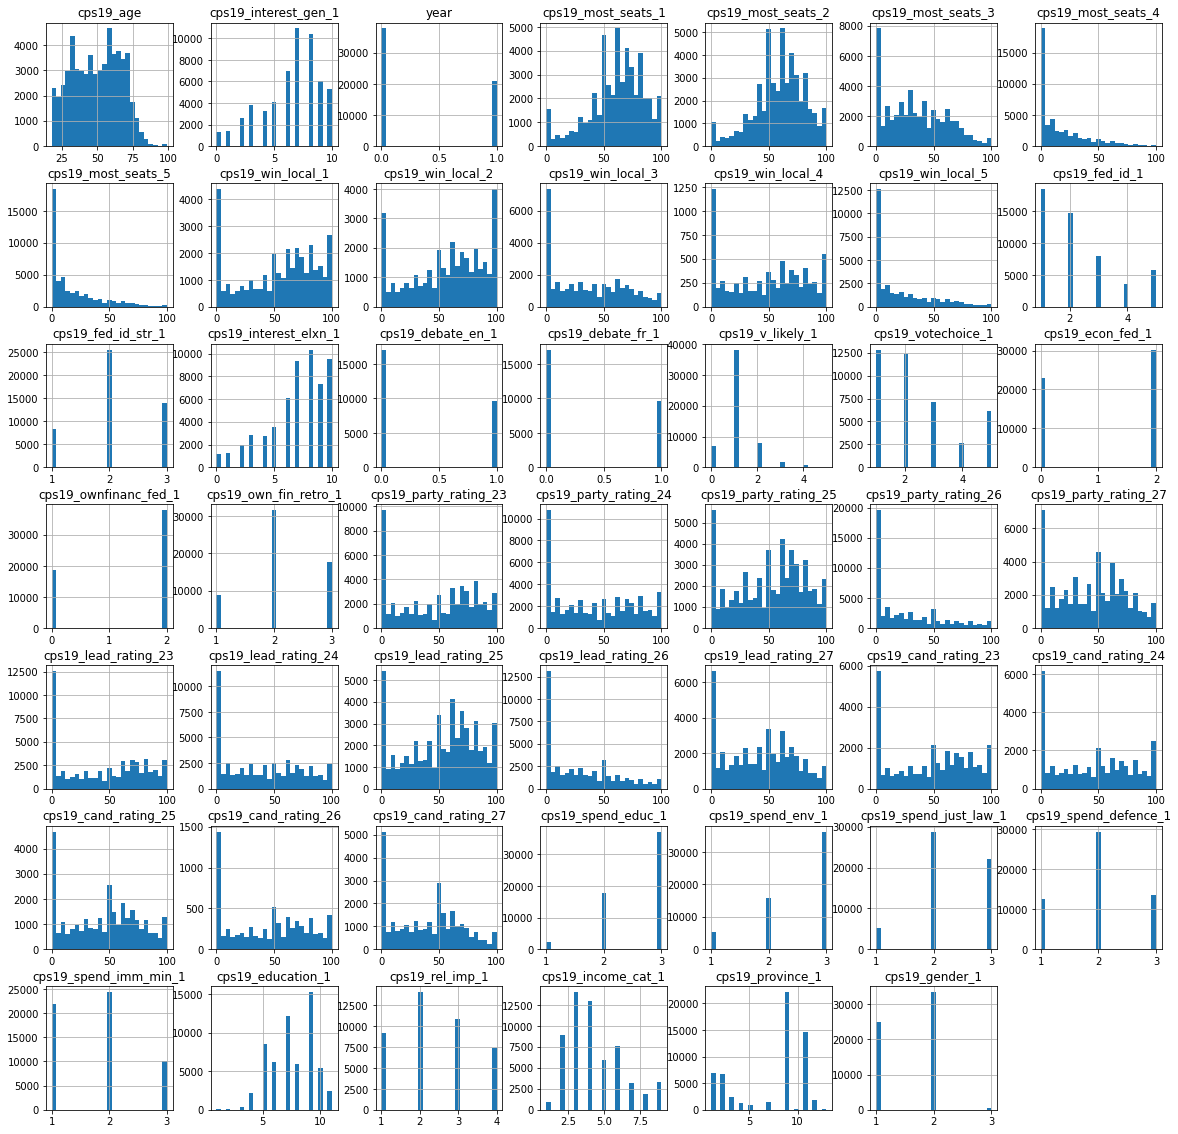

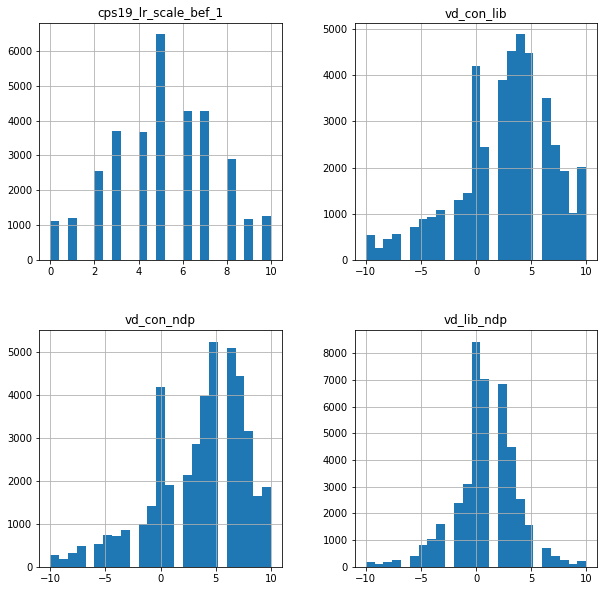

In [ ]:
from zmq.constants import THREAD_AFFINITY_CPU_REMOVE
x_df = pd.DataFrame(df, columns=feature_list)
x_df.hist(figsize=(20,20), bins=25)

y_df = pd.DataFrame(df, columns=predicted)
y_df.hist(figsize=(10,10), bins=25)

def plot_correlation_matrix(df):
  corr_matrix = df.corr()
  plt.figure(figsize=(20,15))
  sns.heatmap(corr_matrix, annot=True)

PLOT_CORRELATION_MATRIX = THREAD_AFFINITY_CPU_REMOVE

if PLOT_CORRELATION_MATRIX:
  plot_correlation_matrix(y_train_df)


## Missing Data Summary

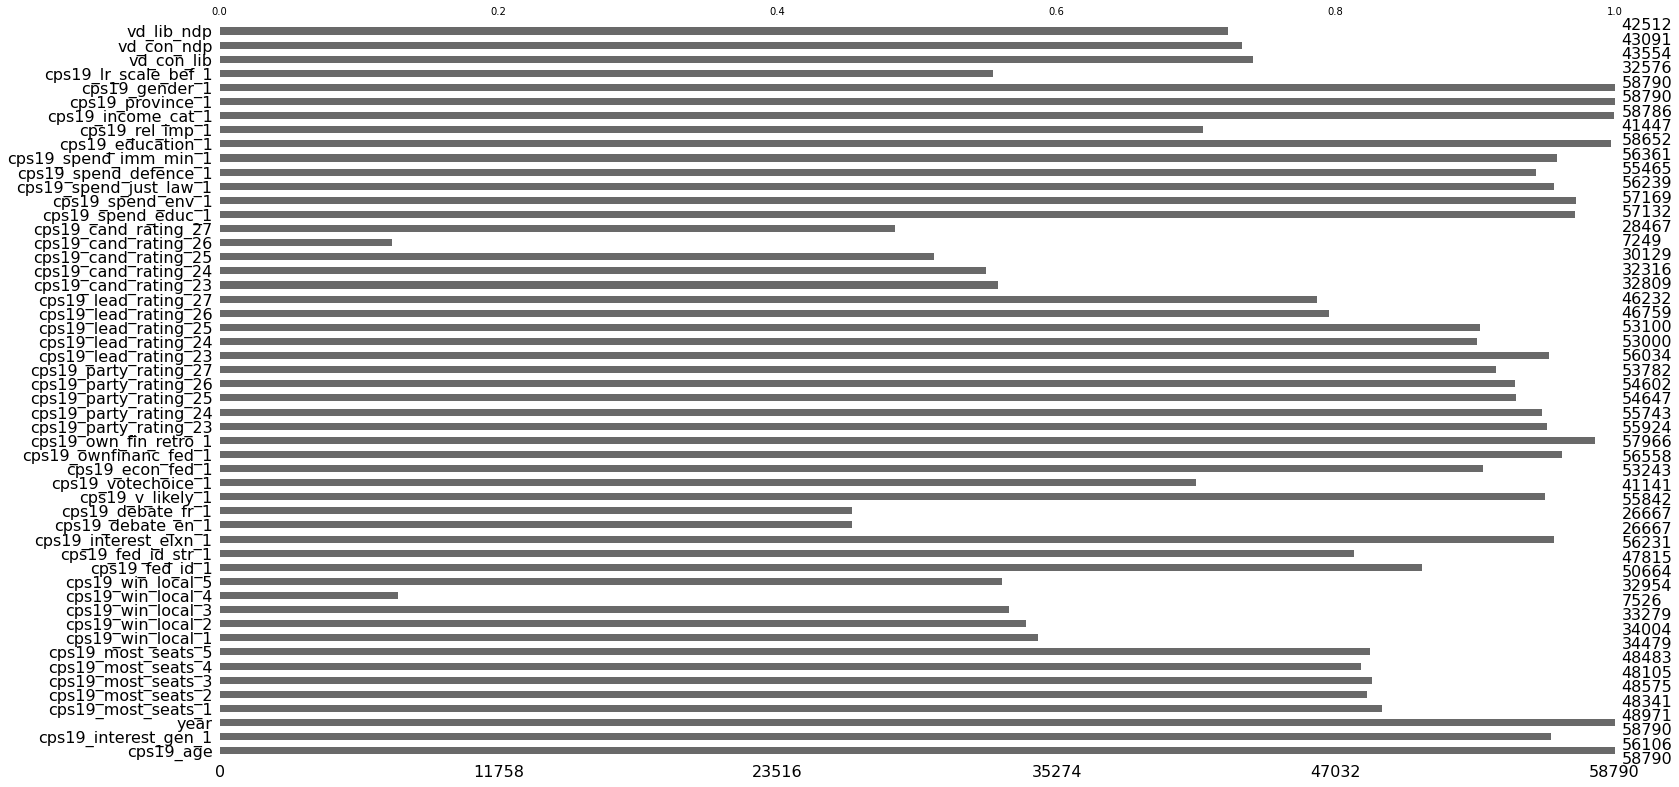

In [ ]:
import missingno

missingno.bar(df[feature_list + predicted])

## Division entraînement-test

In [ ]:
import numpy as np

# spliting training and testing data
# What is Random state?????  random state c'est un code pour contrôler l'aléa 
# de sorte à pouvoir obtenir le même résultat d'un processus qui devrait être aléatoire
from sklearn.model_selection import train_test_split
print("Before clean", df.shape)
df_clean = df[feature_list + predicted].dropna(subset=predicted, how='any')
print(df_clean.shape)
X = df_clean[feature_list] 
y = df_clean[predicted] 
nb_bins = 5  # faire un histogramme pour stratifier la division
bins = ((np.argsort(y, axis=0)/y.shape[0])*nb_bins).astype('int')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43, stratify=bins)
print("Train participants:", X_train.shape[0], "Test participants:",X_test.shape[0])

Before clean (58790, 1792)
(27708, 52)
Train participants: 19395 Test participants: 8313


## Pre-imputation data viz


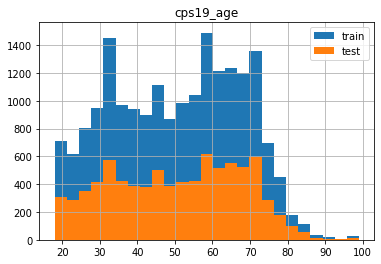

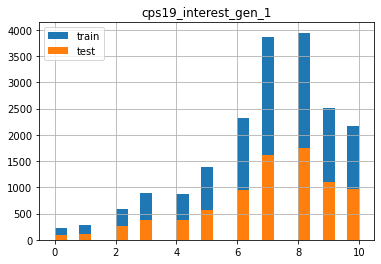

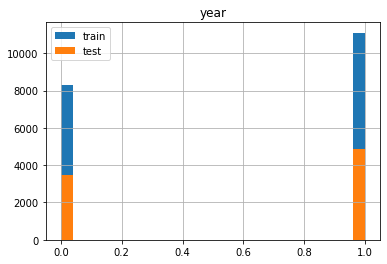

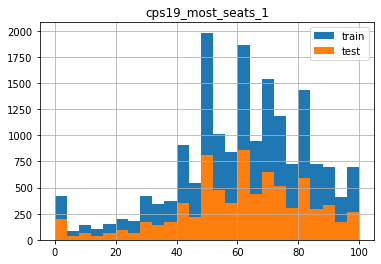

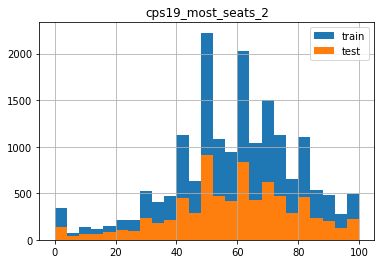

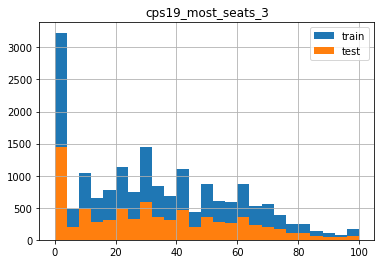

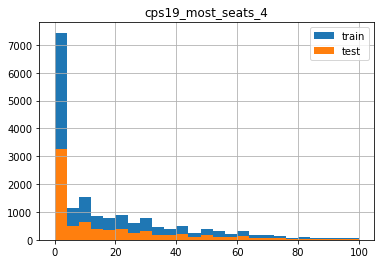

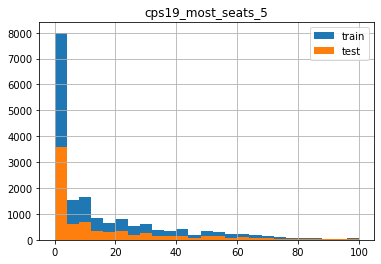

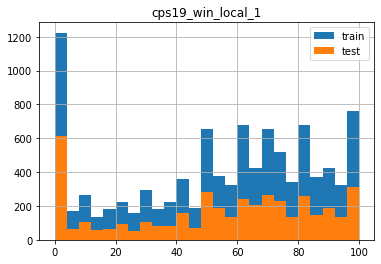

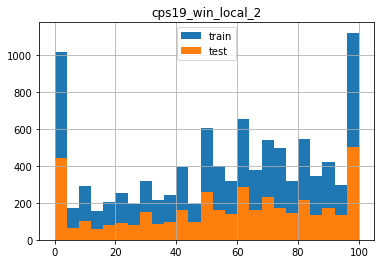

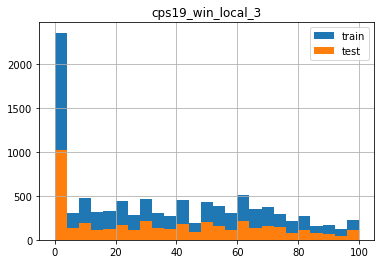

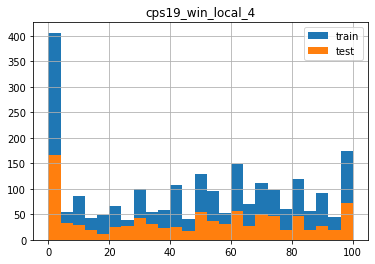

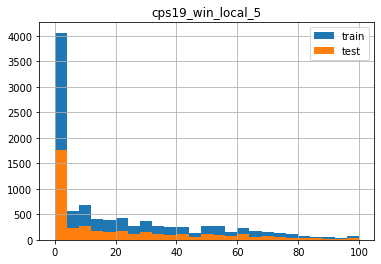

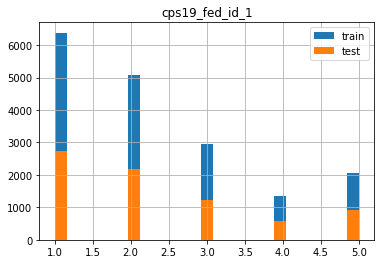

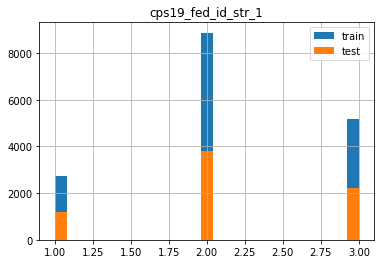

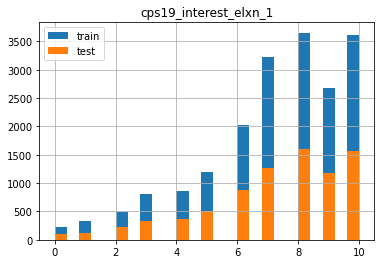

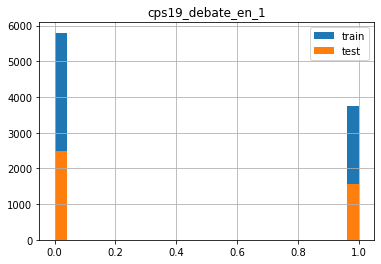

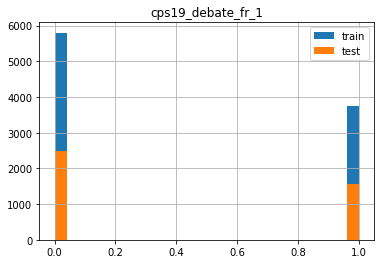

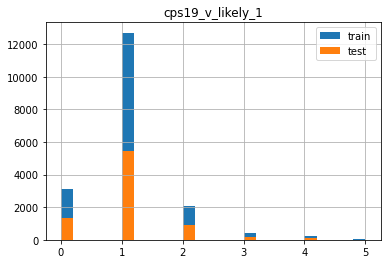

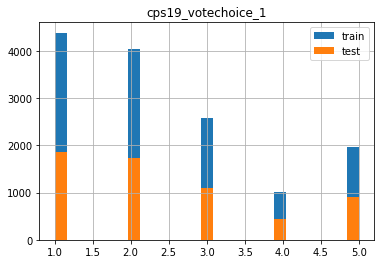

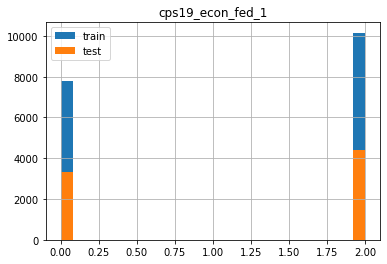

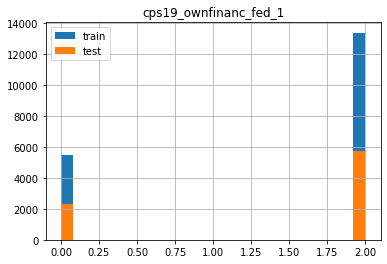

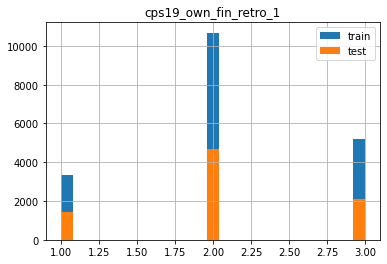

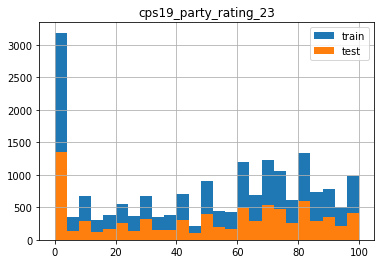

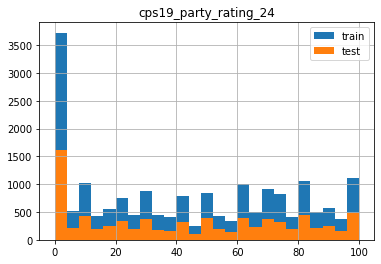

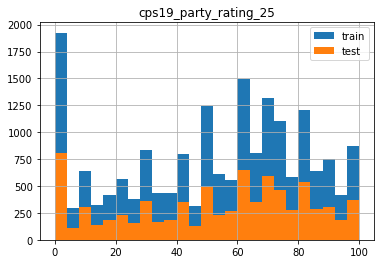

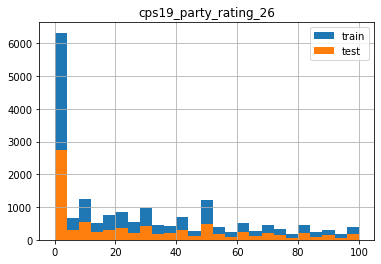

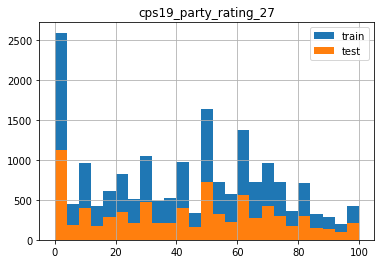

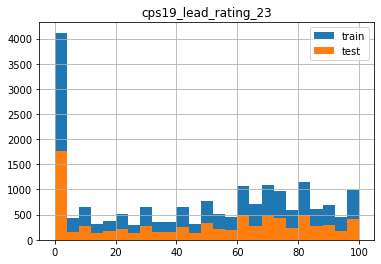

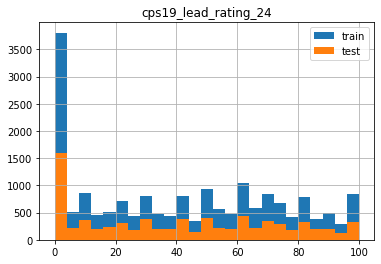

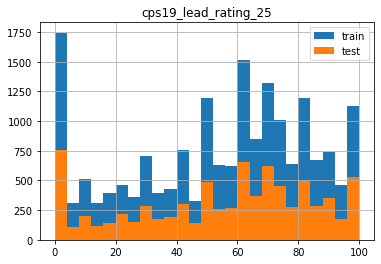

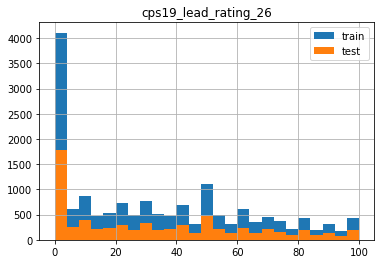

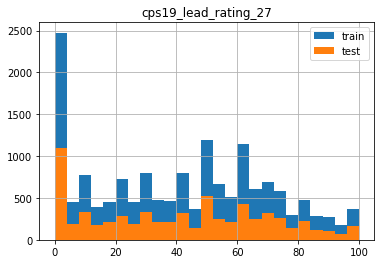

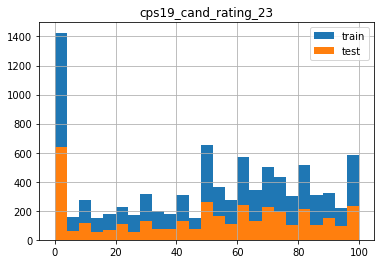

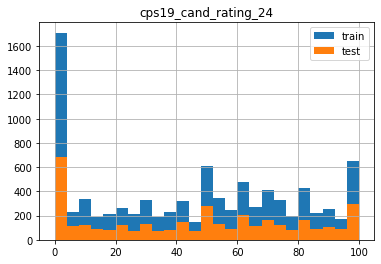

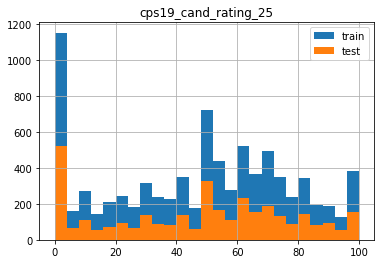

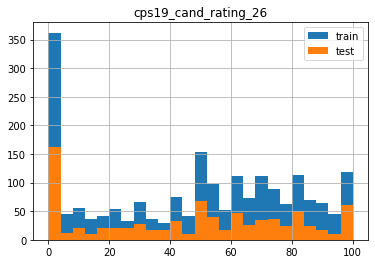

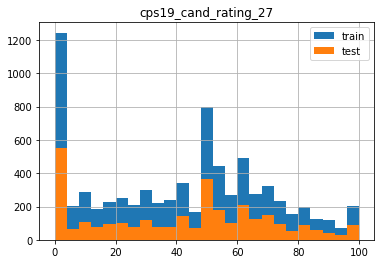

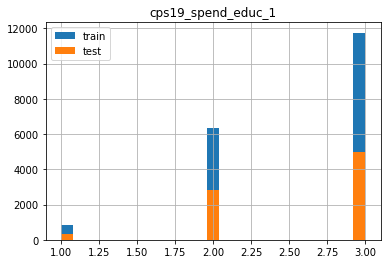

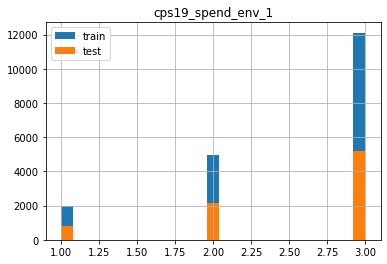

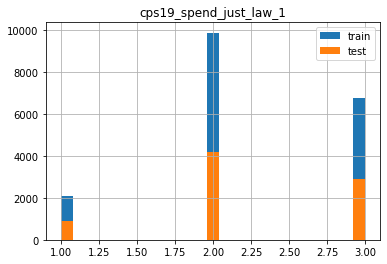

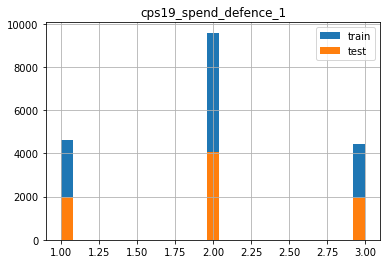

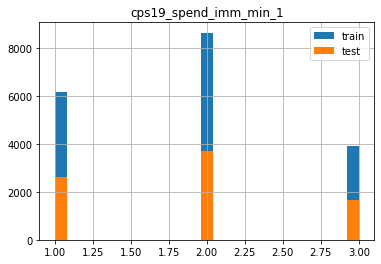

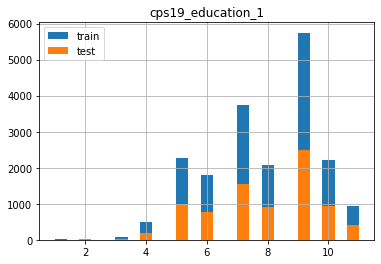

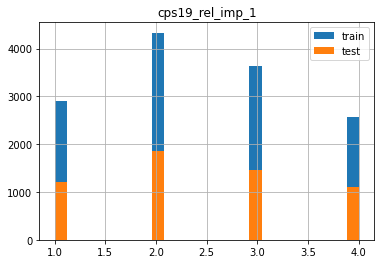

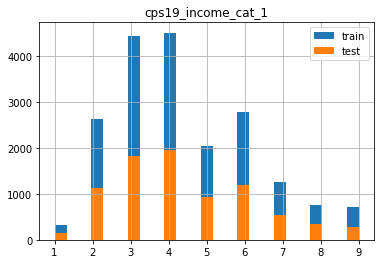

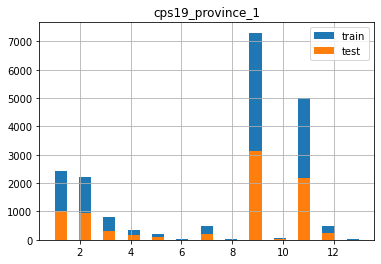

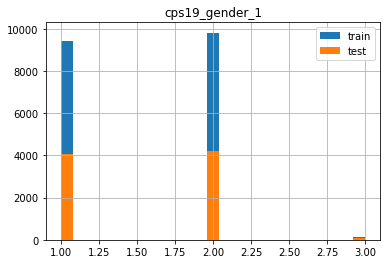

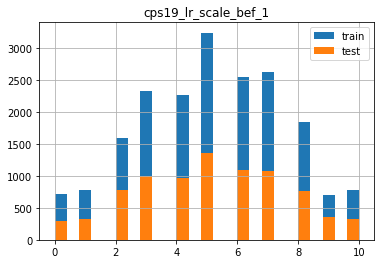

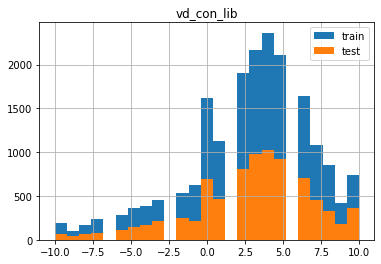

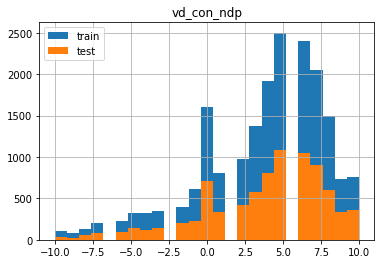

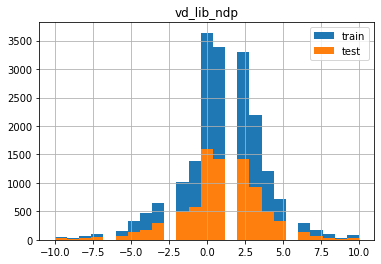

In [ ]:
NB_BINS=25
for f in feature_list: 
  x_train_df = pd.DataFrame(X_train, columns=feature_list)
  ax = x_train_df[f].hist(label="train", bins=NB_BINS)
  x_test_df = pd.DataFrame(X_test, columns=feature_list)
  x_test_df[f].hist(ax=ax, label="test", bins=NB_BINS)
  plt.legend()
  plt.title(f)
  plt.show()

for p in predicted:
  y_train_df = pd.DataFrame(y_train, columns=predicted)
  ax = y_train_df[p].hist(label="train", bins=NB_BINS)
  y_test_df = pd.DataFrame(y_test, columns=predicted)
  y_test_df[p].hist(ax=ax, label="test", bins=NB_BINS)
  plt.legend()
  plt.title(p)
  plt.show()

## Imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# print(X_train.shape, y_train.shape)

# imp_mean = IterativeImputer(random_state=0,skip_complete=True, add_indicator=True)
# train_inputed = imp_mean.fit_transform(pd.concat([X_train, y_train], axis=1, ignore_index=True) )

# test_inputed = imp_mean.fit_transform(pd.concat([X_test, y_test], axis=1, ignore_index=True))

# X_train = train_inputed[:, :len(feature_list)]
# y_train = train_inputed[:, -len(predicted):]

# X_test = test_inputed[:, :len(feature_list)]
# y_test = test_inputed[:, -len(predicted):]

## Exportation données imputées

**Important note**

The imputation process may affect the distributions for missing data. In particular, when using a MLPRegressor as the _estimator_ parameter, some variable's distribution is shifted significantly.





In [ ]:
# from sklearn.neural_network import MLPRegressor
import numpy as np
import json
# imputer = IterativeImputer(estimator=MLPRegressor(hidden_layer_sizes=(X_train.shape[-1],), max_iter=50, early_stopping=True, verbose=True),
#                            initial_strategy='most_frequent',
#                            imputation_order='random',
#                            skip_complete=True, add_indicator=False)

# Make sure we don't impute with non-sense values.
# Does not make sense to have negative values for example
imputer = IterativeImputer(
    max_iter=10, 
    min_value=np.min(X).values, 
    max_value=np.max(X).values
)
print(np.min(X).values)
print(np.max(X).values)

SAMPLE = None
if SAMPLE:
  sample_indices = np.random.choice(X_train.index, size=SAMPLE, replace=False)
  X_train = X_train.loc[sample_indices]
  y_train = y_train.loc[sample_indices]
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)


# Sauvegarder imputation
# train_file = "/content/drive/MyDrive/Ivado/imputed_train_featurelist_year_idstr_02_11_2022_default_iter_imputer.csv"
# test_file = "/content/drive/MyDrive/Ivado/imputed_test_featurelist_year_idstr_02_11_2022_default_iter_imputer.csv"
train_file = "/content/drive/MyDrive/Ivado/imputed_train_featurelist_year_idstr_03_12_2022_final_release_use_for_submit.csv"
test_file = "/content/drive/MyDrive/Ivado/imputed_test_featurelist_year_idstr_03_12_2022_final_release_use_for_submit.csv"
save_imputation = True
if save_imputation:
  imp_train = np.concatenate([X_train_imp, y_train], axis=-1)
  train_df = pd.DataFrame(data=imp_train, columns=feature_list+predicted)
  train_df.to_csv(train_file, index=False)
  imp_test = np.concatenate([X_test_imp, y_test], axis=-1)
  test_df = pd.DataFrame(data=imp_test, columns=feature_list+predicted)
  test_df.to_csv(test_file, index=False)


[18  0  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  0  0  1  0  0  1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1]
[ 99  10   1 100 100 100 100 100 100 100 100 100 100   5   3  10   1   1
   5   5   2   2   3 100 100 100 100 100 100 100 100 100 100 100 100 100
 100 100   3   3   3   3   3  11   4   9  13   3]


/usr/local/lib/python3.8/dist-packages/sklearn/impute/_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


## Post-imputation data viz

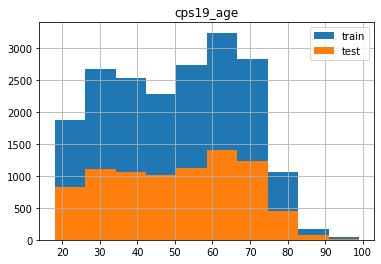

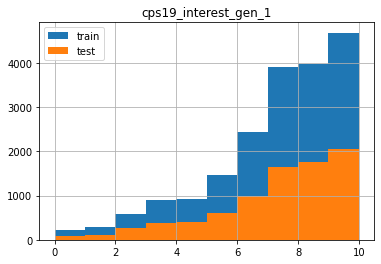

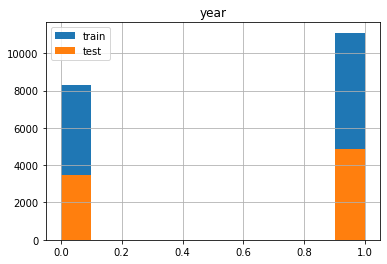

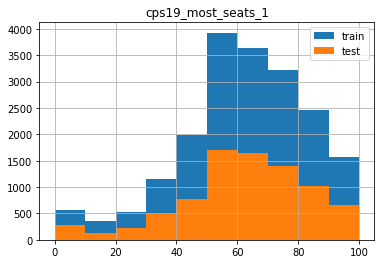

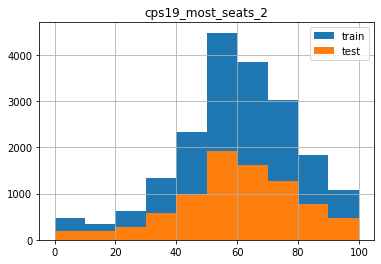

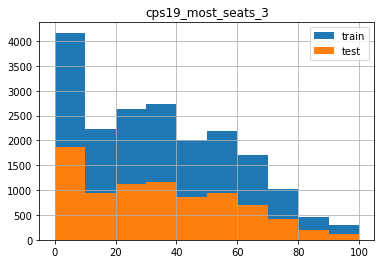

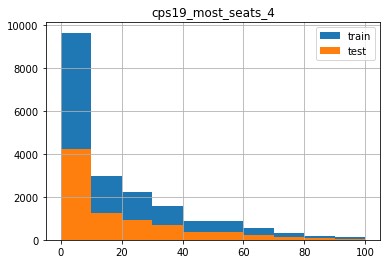

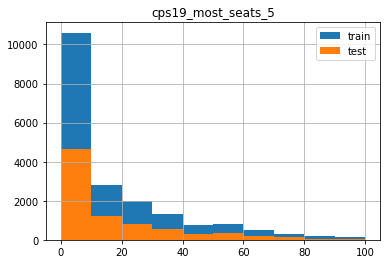

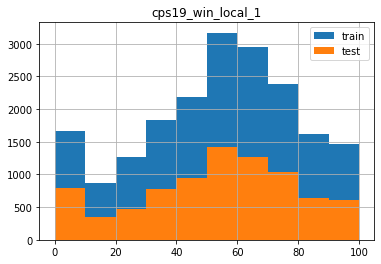

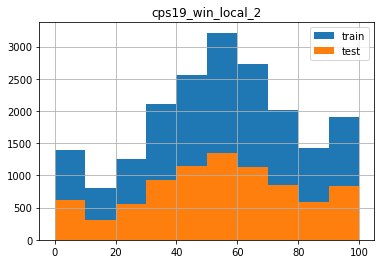

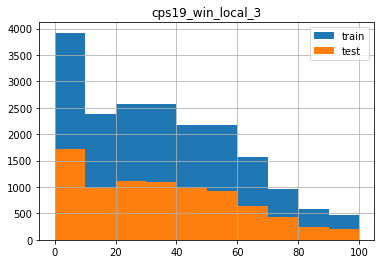

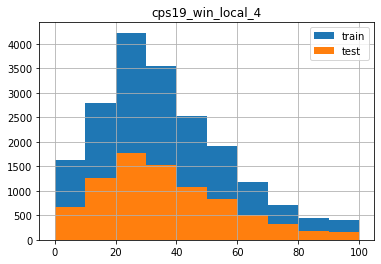

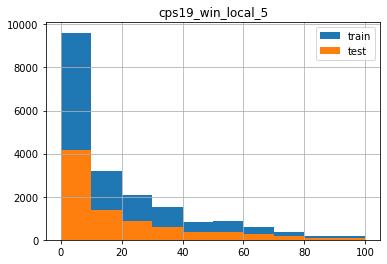

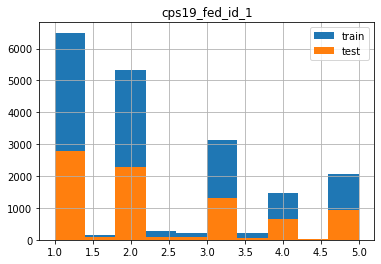

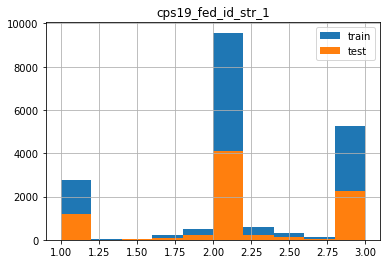

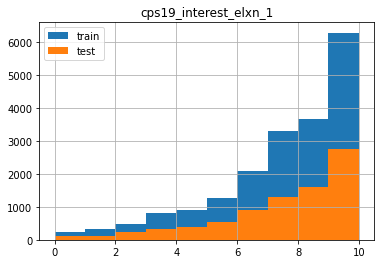

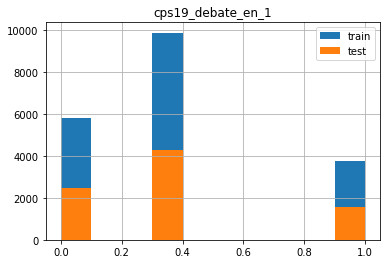

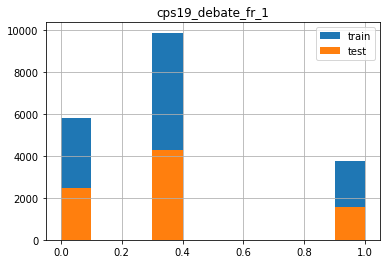

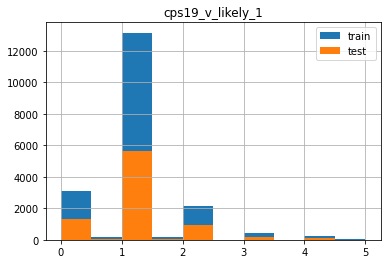

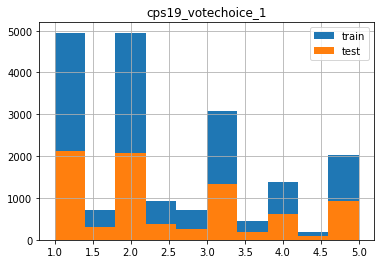

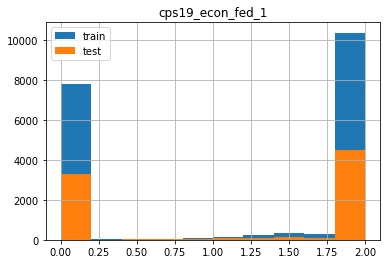

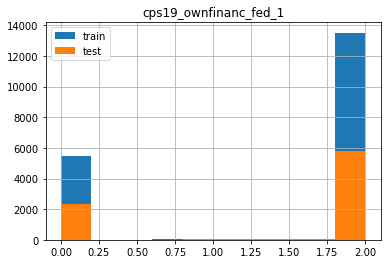

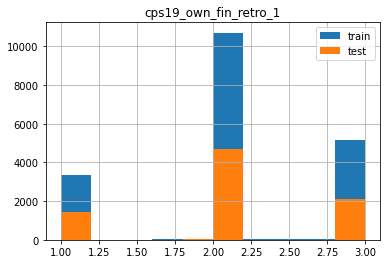

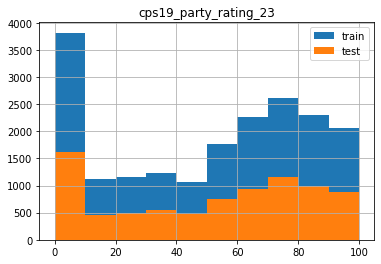

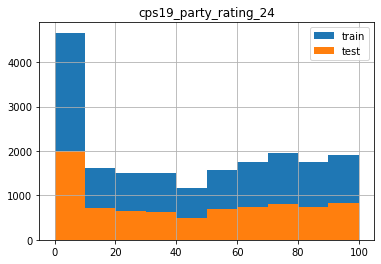

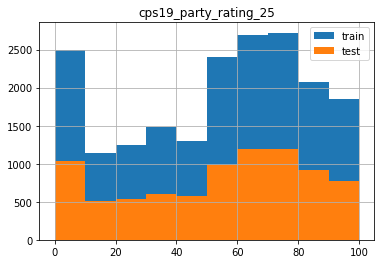

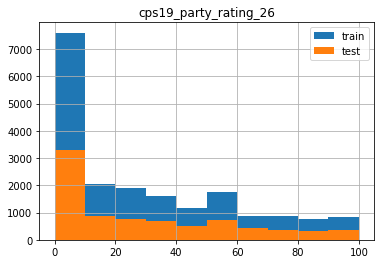

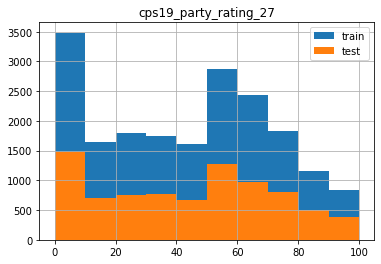

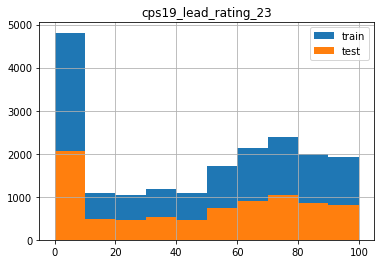

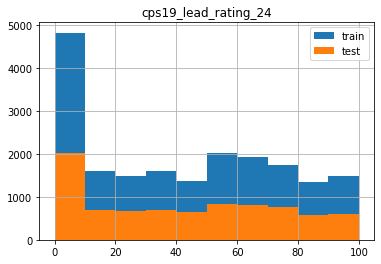

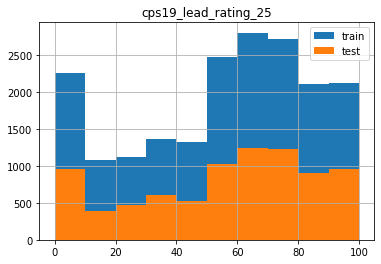

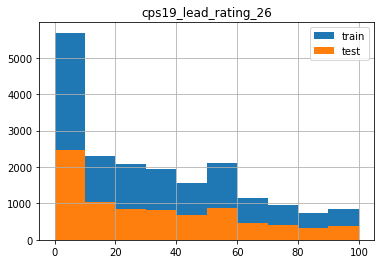

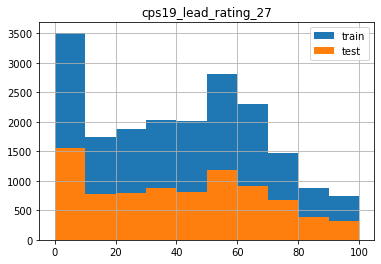

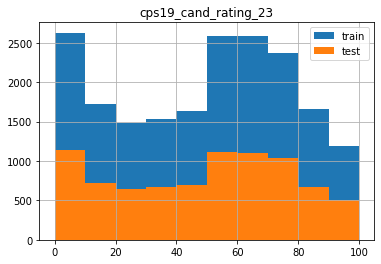

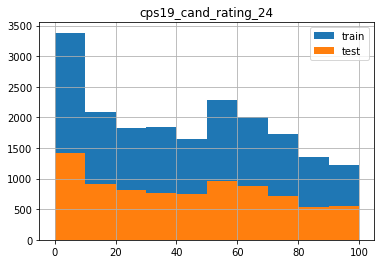

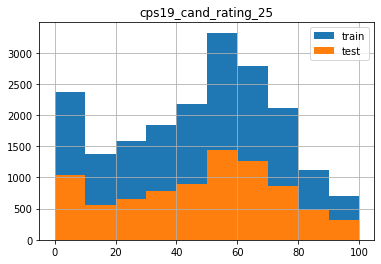

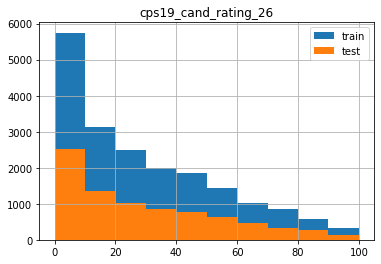

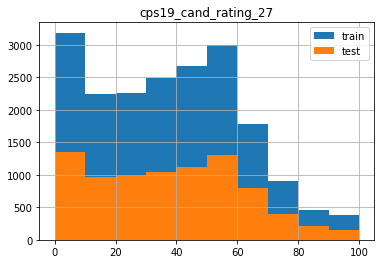

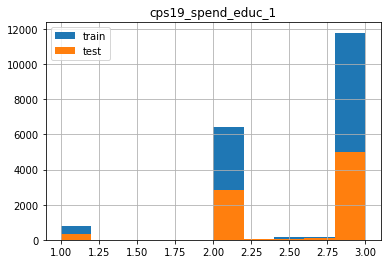

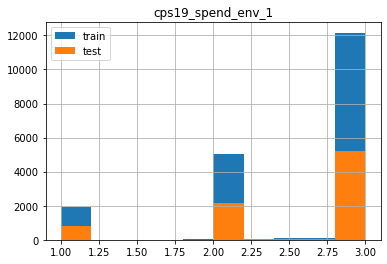

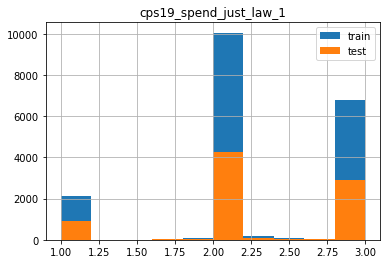

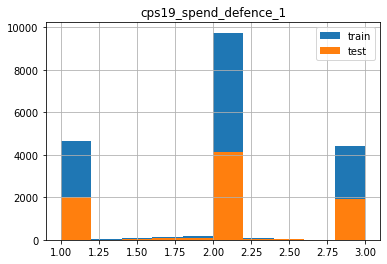

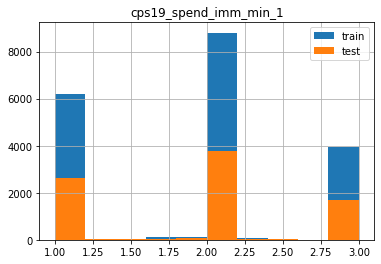

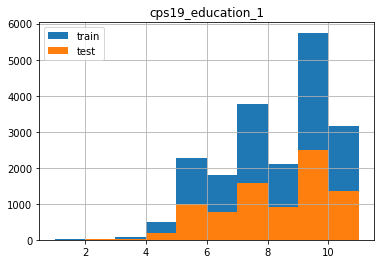

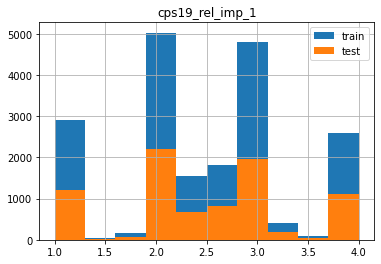

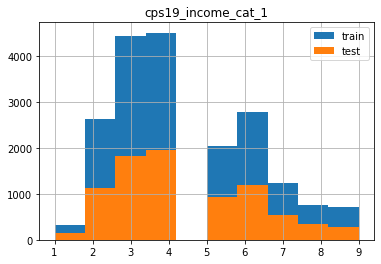

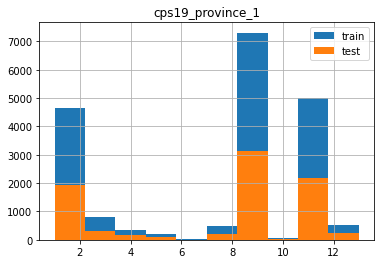

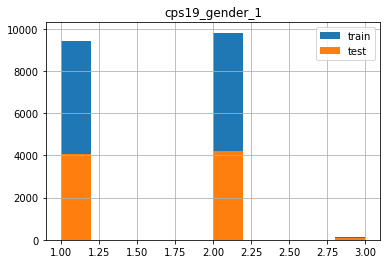

In [ ]:
for f in feature_list: 
  x_train_df = pd.DataFrame(X_train_imp, columns=feature_list)
  ax = x_train_df[f].hist(label="train")
  x_test_df = pd.DataFrame(X_test_imp, columns=feature_list)
  x_test_df[f].hist(ax=ax, label="test")
  plt.legend()
  plt.title(f)
  plt.show()


# Analysis

## **Import Imputed data (train/test sets)**

In [ ]:
import pandas as pd
import json
from google.colab import drive

drive.mount('/content/drive')
# charger imputation
# train_file = "/content/drive/MyDrive/Ivado/imputed_train_featurelist_year_idstr_02_11_2022_default_iter_imputer.csv"
# test_file = "/content/drive/MyDrive/Ivado/imputed_test_featurelist_year_idstr_02_11_2022_default_iter_imputer.csv"

train_file ="/content/drive/MyDrive/Ivado/imputed_train_featurelist_year_idstr_03_12_2022_final_release_use_for_submit.csv"
test_file ="/content/drive/MyDrive/Ivado/imputed_test_featurelist_year_idstr_03_12_2022_final_release_use_for_submit.csv"


test_imp = pd.read_csv(test_file)
train_imp = pd.read_csv(train_file)

print(test_imp["cps19_gender_1"].value_counts())

MessageError: ignored

In [ ]:
print("TRAIN", train_imp.shape)
print("TEST", test_imp.shape)
print(train_imp["vd_lib_ndp"].value_counts(dropna=False))
print(train_imp["vd_con_ndp"].value_counts(dropna=False))
print(train_imp["vd_con_lib"].value_counts(dropna=False))


## Data preparation

### Province and Gender one hot

In [ ]:
import sklearn
from sklearn import preprocessing
# print(df["cps19_gender_1"])
# encoder = preprocessing.OneHotEncoder()
# encoder.fit(df["cps19_gender_1"])
# encoder.toarray()
# print(df["cps19_gender_1"].values)
# print(df["cps19_gender_1"])
# print(pd.get_dummies(df["cps19_gender_1"]))
# print(pd.get_dummies(df["cps19_province_1"]))
# print(pd.get_dummies(df["cps19_duty_choice_1"]))
# print(pd.get_dummies(df["cps19_debate_en_1"]))
# print(pd.get_dummies(df["cps19_debate_fr_1"]))
# print(pd.get_dummies(df["cps19_votechoice_1"]))
# print(pd.get_dummies(df["cps19_fed_id_1"]))
# print(pd.get_dummies(df["cps19_outcome_most_1"]))
train_imp["cps19_gender_1"] = train_imp["cps19_gender_1"].map(int, na_action='ignore')
test_imp["cps19_gender_1"] = test_imp["cps19_gender_1"].map(int, na_action='ignore')

train_imp = pd.get_dummies(train_imp, columns=['cps19_gender_1','cps19_province_1'])
test_imp = pd.get_dummies(test_imp, columns=['cps19_gender_1','cps19_province_1'])

### Fed ID One-hot encoded

In [ ]:
def recode_federal_id(df):
  df['cps19_fed_id_lib_onehot'] = df['cps19_fed_id_1']
  df.loc[df['cps19_fed_id_1'] != 1, 'cps19_fed_id_lib_onehot'] = 0
  df.loc[df['cps19_fed_id_1'] == 1, 'cps19_fed_id_lib_onehot'] = 1

  df['cps19_fed_id_cons_onehot'] = df['cps19_fed_id_1']
  df.loc[df['cps19_fed_id_1'] != 2, 'cps19_fed_id_cons_onehot'] = 0
  df.loc[df['cps19_fed_id_1'] == 2, 'cps19_fed_id_cons_onehot'] = 1

  df['cps19_fed_id_ndp_onehot'] = df['cps19_fed_id_1']
  df.loc[df['cps19_fed_id_1'] != 3, 'cps19_fed_id_ndp_onehot'] = 0
  df.loc[df['cps19_fed_id_1'] == 3, 'cps19_fed_id_ndp_onehot'] = 1

  df['cps19_fed_id_bloc_onehot'] = df['cps19_fed_id_1']
  df.loc[df['cps19_fed_id_1'] != 4, 'cps19_fed_id_bloc_onehot'] = 0
  df.loc[df['cps19_fed_id_1'] == 4, 'cps19_fed_id_bloc_onehot'] = 1

  df['cps19_fed_id_other_onehot'] = df['cps19_fed_id_1']
  df.loc[df['cps19_fed_id_1'] != 5, 'cps19_fed_id_other_onehot'] = 0
  df.loc[df['cps19_fed_id_1'] == 5, 'cps19_fed_id_other_onehot'] = 1


recode_federal_id(train_imp)
recode_federal_id(test_imp)


### Vote choice One-hot encoded

Original df uses an integer to define which party participants voted for. We split the data into a new column for each party with a binary value.

In [ ]:

def recode_vote_choice(df):
  df['cps19_votechoice_onehot'] = df['cps19_votechoice_1']
  df.loc[df['cps19_votechoice_1'] != 1, 'cps19_votechoice_lib_onehot'] = 0
  df.loc[df['cps19_votechoice_1'] == 1, 'cps19_votechoice_lib_onehot'] = 1

  df['cps19_votechoice_cons_onehot'] = df['cps19_votechoice_1']
  df.loc[df['cps19_votechoice_1'] != 2, 'cps19_votechoice_cons_onehot'] = 0
  df.loc[df['cps19_votechoice_1'] == 2, 'cps19_votechoice_cons_onehot'] = 1

  df['cps19_votechoice_ndp_onehot'] = df['cps19_votechoice_1']
  df.loc[df['cps19_votechoice_1'] != 3, 'cps19_votechoice_ndp_onehot'] = 0
  df.loc[df['cps19_votechoice_1'] == 3, 'cps19_votechoice_ndp_onehot'] = 1

  df['cps19_votechoice_bloc_onehot'] = df['cps19_votechoice_1']
  df.loc[df['cps19_votechoice_1'] < 4, 'cps19_votechoice_other_onehot'] = 0
  df.loc[df['cps19_votechoice_1'] >= 4 , 'cps19_votechoice_other_onehot'] = 1


recode_vote_choice(train_imp)
recode_vote_choice(test_imp)


### Recoding parties - Chances of winning and party feelings

Collapse political parties.
Only consider the 3 main parties and collapse other parties

In [ ]:
#PARTY FEELINGS (19 & 21 done)
#cps19_party_rating_23 - liberal
#cps19_party_rating_24 - Conservatives
#cps19_party_rating_25 - NDP
#cps19_party_rating_26 - Bloc
#cps19_party_rating_27 - Green

#cps19_lead_rating_23  - Justin Trudeau
#cps19_lead_rating_24 - Andrew Scheer
#cps19_lead_rating_25 - Jagmeet Singh
#cps19_lead_rating_26 - Yves-Francois Blanchet
#cps19_lead_rating_27 - Elizabeth May

#cps19_cand_rating_23 - Local Lib
#cps19_cand_rating_24 - Local Conservative
#cps19_cand_rating_25 - Local NDP
#cps19_cand_rating_26 - Local Bloc
#cps19_cand_rating_27 - Local Green


def recode_party_rating(prefix, df):
  df[f"{prefix}_lib"] = df[f"{prefix}_23"]
  df[f"{prefix}_cons"] = df[f"{prefix}_24"]
  df[f"{prefix}_ndp"] = df[f"{prefix}_25"]
  df[f"{prefix}_other"] = df[[f"{prefix}_26", f"{prefix}_27"]].mean(axis=1)

recode_party_rating("cps19_party_rating", train_imp)
recode_party_rating("cps19_party_rating", test_imp)

recode_party_rating("cps19_lead_rating", train_imp)
recode_party_rating("cps19_lead_rating", test_imp)

recode_party_rating("cps19_cand_rating", train_imp)
recode_party_rating("cps19_cand_rating", test_imp)


#CHANCES OF WINNING

#cps19_most_seats_1 -- Liberal
#cps19_most_seats_2 -- Conservative
#cps19_most_seats_3 -- NDP
#cps19_most_seats_4 -- Bloc
#cps19_most_seats_5 -- Green

#cps19_win_local_1 -- Liberal
#cps19_win_local_2 -- Conservative
#cps19_win_local_3 -- NDP
#cps19_win_local_4 -- Bloc
#cps19_win_local_5 -- Green

def recode_chances_of_winning(prefix, df):
  df[f"{prefix}_lib"] = df[f"{prefix}_1"]
  df[f"{prefix}_cons"] = df[f"{prefix}_2"]
  df[f"{prefix}_ndp"] = df[f"{prefix}_3"]
  df[f"{prefix}_other"] = df[[f"{prefix}_4", f"{prefix}_5"]].mean(axis=1)

recode_chances_of_winning("cps19_most_seats", train_imp)
recode_chances_of_winning("cps19_most_seats", test_imp)

recode_chances_of_winning("cps19_win_local", train_imp)
recode_chances_of_winning("cps19_win_local", test_imp)






## Labelled Features


In [ ]:
from copy import deepcopy

seats = [
    {"party": "lib", "col": "cps19_most_seats_lib"},
    {"party": "cons", "col": "cps19_most_seats_cons"},
    {"party": "ndp", "col": "cps19_most_seats_ndp"},
    {"party": "other", "col": "cps19_most_seats_other"},
]

win = [
    {"party": "lib", "col": "cps19_win_local_lib"},
    {"party": "cons", "col": "cps19_win_local_cons"},
    {"party": "ndp", "col": "cps19_win_local_ndp"},
    {"party": "other", "col":"cps19_win_local_other"},
]

core = [
    "cps19_interest_gen_1",
    "year",
    "cps19_fed_id_str_1"
] + seats + win

identity = [
    "cps19_fed_id_1",
    {"party": "lib", "col": "cps19_fed_id_lib"}, 
    {"party": "cons", "col": "cps19_fed_id_cons"}, 
    {"party": "ndp", "col": "cps19_fed_id_ndp"}, 
    {"party": "bloc", "col": "cps19_fed_id_bloc"}, 
    {"party": "other", "col":"cps19_fed_id_other"}, 
]

identity_one_hot = [
    {"party": "lib", "col": "cps19_fed_id_lib_onehot"}, 
    {"party": "cons", "col":"cps19_fed_id_cons_onehot"}, 
    {"party": "ndp", "col": "cps19_fed_id_ndp_onehot"}, 
    {"party":"bloc", "col": "cps19_fed_id_bloc_onehot"}, 
    {"party": "other", "col": "cps19_fed_id_other_onehot"},        
]

religion = [
  "cps19_rel_imp_1"
]

demographics = [
    # "cps19_gender_1",
    # "cps19_province_1",
    "cps19_age",
    "cps19_education_1",
    # "cps19_income_number", # This variable is continuous
    "cps19_income_cat_1", # This variable is categorical
]

gender = [
    "cps19_gender_1_1",
    "cps19_gender_1_2",
    "cps19_gender_1_3",
]

province = [
    "cps19_province_1_1",
    "cps19_province_1_2",
    "cps19_province_1_3",
    "cps19_province_1_4",
    "cps19_province_1_5",
    "cps19_province_1_6",
    "cps19_province_1_7",
    "cps19_province_1_8",
    "cps19_province_1_9",
    "cps19_province_1_10",
    "cps19_province_1_11",
    "cps19_province_1_12",
    "cps19_province_1_13",
]
            
political_sofistication = [
    "cps19_interest_elxn_1",
    "cps19_debate_en_1",
    "cps19_debate_fr_1",                      
]

voting_intention = [
    "cps19_v_likely_1"
]

voting = [
    "cps19_votechoice_1"
]

votechoice_one_hot = [
    {"party": "lib", "col": "cps19_votechoice_lib_onehot"}, 
    {"party": "cons", "col": "cps19_votechoice_cons_onehot"}, 
    {"party": "ndp", "col": "cps19_votechoice_ndp_onehot"}, 
    {"party": "other", "col":"cps19_votechoice_other_onehot"},        
]

party_rating = [
    {"party": "lib", "col": "cps19_party_rating_lib"},
    {"party": "cons", "col": "cps19_party_rating_cons"},
    {"party": "ndp", "col": "cps19_party_rating_ndp"},
    {"party": "other", "col": "cps19_party_rating_other"},
    {"party": "lib", "col": "cps19_lead_rating_lib"},
    {"party": "cons", "col":"cps19_lead_rating_cons"}, 
    {"party": "ndp", "col": "cps19_lead_rating_ndp"},
    {"party": "other", "col":"cps19_lead_rating_other"},
   ] 

candidate_rating = [
    {"party": "lib", "col":"cps19_cand_rating_lib"},
    {"party": "cons", "col":"cps19_cand_rating_cons"},
    {"party": "ndp", "col":"cps19_cand_rating_ndp"},
    {"party": "other", "col": "cps19_cand_rating_other"},
 ] 


issue_rating = [
    "cps19_spend_educ_1",
    "cps19_spend_env_1",
    "cps19_spend_just_law_1",
    "cps19_spend_defence_1",
    "cps19_spend_imm_min_1",             
]

economy = [
    "cps19_econ_fed_1",
    "cps19_ownfinanc_fed_1",
    "cps19_own_fin_retro_1",
]

descriptive_feature_list = core \
+ party_rating \
+ demographics \
+ candidate_rating \
+ votechoice_one_hot \
+ gender

# + identity_one_hot 
# + voting \
# + economy \
# + issue_rating \
# + province \
# + religion \ # Not many people answered this question



def build_model_features(excluded_parties):

  def filter_excluded_party(f):
    return type(f) != dict or f["party"] not in excluded_parties

  def extract_col_name(f):
    if type(f) != dict:
      return f

    return f["col"]
  
  model_features =  map(extract_col_name, filter(filter_excluded_party, descriptive_feature_list))
  return list(model_features)

feature_list = build_model_features([])


descriptive_predicted =[
    # "cps19_lr_parties_1", 
    # "cps19_lr_parties_2", 
    # "cps19_lr_parties_3",
    {"exclude": ["other", "ndp"], "col":"vd_con_lib"},
    {"exclude": ["other", "lib"], "col": "vd_con_ndp"},
    {"exclude": ["other", "cons"], "col":"vd_lib_ndp"}
  ]
predicted = list(map(lambda f: f["col"], descriptive_predicted))
# Only used for analysis to compare against pre-existing data when applying filter 
test_copy = test_imp.copy(deep=True)
train_copy = train_imp.copy(deep=True)
descriptive_feature_list_copy = deepcopy(descriptive_feature_list)
feature_list_copy = deepcopy(feature_list)
# TODO use `build_model_features to get col names`
# train_imp[feature_list + predicted].hist(figsize=(20,20))



## Data Experiment Flags

In [ ]:
import matplotlib.pyplot as plt
NB_BINS=25
# Get a new copy of data to restart experiments with the original data
test_imp = test_copy.copy(deep=True)
train_imp = train_copy.copy(deep=True)
descriptive_feature_list = deepcopy(descriptive_feature_list_copy)
feature_list = deepcopy(feature_list_copy)
# We exclude records where the party placement has a negative value
# We run it after the data was imputed
def drop_negative_vd(test_imp, train_imp, descriptive_feature_list):
  criterion =  (test_imp.vd_lib_ndp < 0) | (test_imp.vd_con_ndp < 0)
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = (train_imp.vd_lib_ndp < 0) | (train_imp.vd_con_ndp < 0)
  train_imp.drop(train_imp[criterion].index, inplace=True)

def absolute_dependent_variable(test_imp, train_imp, descriptive_feature_list):
  train_imp[predicted] = train_imp[predicted].abs()
  test_imp[predicted] = test_imp[predicted].abs()

# Remove participants from Quebec
def exclude_quebec(test_imp, train_imp, descriptive_feature_list):
  criterion = test_imp["cps19_province_1_11"] == 1
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = train_imp["cps19_province_1_11"] == 1
  train_imp.drop(train_imp[criterion].index, inplace=True)

#Results only for NDP partisans
def keep_ndp_partisans(test_imp, train_imp, descriptive_feature_list):

  criterion = test_imp["cps19_fed_id_ndp_onehot"] == 0
  
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = train_imp["cps19_fed_id_ndp_onehot"] == 0
  train_imp.drop(train_imp[criterion].index, inplace=True)

#Results only for Conservative partisans

def keep_conservative_partisans(test_imp, train_imp, descriptive_feature_list):

  criterion = test_imp["cps19_fed_id_cons_onehot"] == 0
  
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = train_imp["cps19_fed_id_cons_onehot"] == 0
  train_imp.drop(train_imp[criterion].index, inplace=True)

  #Results only for Liberal partisans


def keep_liberal_partisans(test_imp, train_imp, descriptive_feature_list):

  criterion = test_imp["cps19_fed_id_lib_onehot"] == 0
  
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = train_imp["cps19_fed_id_lib_onehot"] == 0
  train_imp.drop(train_imp[criterion].index, inplace=True)


#Results only for NDP voters
def drop_ndp_voters(test_imp, train_imp, descriptive_feature_list):

  criterion = test_imp["cps19_votechoice_ndp_onehot"] == 1
  
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = train_imp["cps19_votechoice_ndp_onehot"] == 1
  train_imp.drop(train_imp[criterion].index, inplace=True)
  # Get rid of vote_choice variable. We keep a copy of variables everytime we rerun experiments
  # return [f for f in descriptive_feature_list if f not in votechoice_one_hot ]


#Results only for Conservative voters

def drop_conservative_voters(test_imp, train_imp, descriptive_feature_list):

  criterion = test_imp["cps19_votechoice_cons_onehot"] == 1
  
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = train_imp["cps19_votechoice_cons_onehot"] == 1
  train_imp.drop(train_imp[criterion].index, inplace=True)
  # Get rid of vote_choice variable. We keep a copy of variables everytime we rerun experiments
  # return [f for f in descriptive_feature_list if f not in votechoice_one_hot ]

  #Results only for Liberal voters


def drop_liberal_voters(test_imp, train_imp, descriptive_feature_list):

  criterion = test_imp["cps19_votechoice_lib_onehot"] == 1
  
  test_imp.drop(test_imp[criterion].index, inplace=True)

  criterion = train_imp["cps19_votechoice_lib_onehot"] == 1
  train_imp.drop(train_imp[criterion].index, inplace=True)
  # Get rid of vote_choice variable. We keep a copy of variables everytime we rerun experiments
  # return [x for x in descriptive_feature_list if x not in votechoice_one_hot ]



def print_features_distribution(test_imp, train_imp, descriptive_feature_list):
  print(train_copy.shape, train_imp.shape, test_copy.shape, test_imp.shape)
  for f in feature_list:
    fig, ax = plt.subplots(1, 2)
    train_copy[f].hist(ax=ax[0], label="train", bins=NB_BINS)
    test_copy[f].hist(ax=ax[0], label="test", bins=NB_BINS)
    train_imp[f].hist(ax=ax[1], label="train_filtered", bins=NB_BINS)
    test_imp[f].hist(ax=ax[1], label="test_filtered", bins=NB_BINS)
    ax[0].legend()
    ax[1].legend()
    ax[0].title.set_text(f"train:{train_copy.shape[0]} test: {test_copy.shape[0]}")
    ax[1].title.set_text(f"train:{train_imp.shape[0]} test: {test_imp.shape[0]}")
    fig.suptitle(f"{f}")
    plt.show()

def print_predicted_distribution(test_imp, train_imp, descriptive_feature_list):
  print(train_copy.shape, train_imp.shape, test_copy.shape, test_imp.shape)
  for f in predicted:
    fig, ax = plt.subplots(1, 2)
    train_copy[f].hist(ax=ax[0], label="train", bins=NB_BINS)
    test_copy[f].hist(ax=ax[0], label="test", bins=NB_BINS)
    train_imp[f].hist(ax=ax[1], label="train_filtered", bins=NB_BINS)
    test_imp[f].hist(ax=ax[1], label="test_filtered", bins=NB_BINS)
    ax[0].legend()
    ax[1].legend()
    ax[0].title.set_text(f"train:{train_copy.shape[0]} test: {test_copy.shape[0]}")
    ax[1].title.set_text(f"train:{train_imp.shape[0]} test: {test_imp.shape[0]}")
    fig.suptitle(f"{f}")
    plt.show()


def recode_fed_id_strength(test_imp, train_imp, descriptive_feature_list ):
  def do_it(df):
    df['cps19_fed_id_str_1'] = df['cps19_fed_id_str_1'] - 3 
    df['cps19_fed_id_str_1'] = df['cps19_fed_id_str_1'].abs() 

  do_it(train_imp)
  do_it(test_imp)


def filter_most_seat_ndp(test_imp, train_imp, descriptive_feature_list):
    criterion = test_imp["cps19_most_seats_ndp"] > 50
    test_imp.drop(test_imp[criterion].index, inplace=True)

    criterion = train_imp["cps19_most_seats_ndp"] > 50
    train_imp.drop(train_imp[criterion].index, inplace=True)

def filter_few_seat_ndp(test_imp, train_imp, descriptive_feature_list):
    criterion = test_imp["cps19_most_seats_ndp"] < 50
    test_imp.drop(test_imp[criterion].index, inplace=True)

    criterion = train_imp["cps19_most_seats_ndp"] < 50
    train_imp.drop(train_imp[criterion].index, inplace=True)

def plot_correlation_matrix(test_imp, train_imp, descriptive_feature_list):
  imo
  df = pd.concat([train_imp, test_imp])
  corr_matrix = df.corr()
  plt.figure(figsize=(20,15))
  sns.heatmap(corr_matrix, annot=True)
  plt.show()

EXPERIMENT_FLAGS =  {
  exclude_quebec: False,
  filter_most_seat_ndp: False,
  filter_few_seat_ndp: False,
  keep_ndp_partisans: True,
  keep_conservative_partisans: False,
  keep_liberal_partisans: False,
  drop_ndp_voters: False,
  drop_conservative_voters: False,
  drop_liberal_voters: False,
  drop_negative_vd: False,
  recode_fed_id_strength: False,
  absolute_dependent_variable: True,
  print_features_distribution: False,
  print_predicted_distribution: False,
  plot_correlation_matrix: True,
}

for experiment, is_enabled in EXPERIMENT_FLAGS.items():
  if is_enabled:
    print("Running experiment", experiment)
    # Allow experiments to mutate the list of variables
    descriptive_feature_list_out = experiment(test_imp, train_imp, descriptive_feature_list)
  
    if descriptive_feature_list_out is not None:
      print("descriptive_feature_list_out", descriptive_feature_list_out)
      descriptive_feature_list = descriptive_feature_list_out
      feature_list = build_model_features([])



NameError: ignored

##Descriptives of the population of the sample

In [ ]:
data = pd.concat([train_imp, test_imp])
print("total:", data.shape[0], "train:", train_imp.shape[0], "test:", test_imp.shape[0])
# pd.set_option('display.max_columns', None)
data[feature_list].describe()
print("Mean:", data[predicted].mean())
print("STD:", data[predicted].std())
print("Partisans who voted for conservatives:", data[(data["cps19_votechoice_cons_onehot"] ==1)].shape[0])
print("Partisans who voted for liberals:",data[(data["cps19_votechoice_lib_onehot"] ==1)].shape[0])
print("Partisans who voted for NDP:",data[(data["cps19_votechoice_ndp_onehot"] ==1)].shape[0])
print("Mean age:", data['cps19_age'].mean())
print("Std Age:", data['cps19_age'].std())
print("Min age:", data['cps19_age'].min())
print("Max Age:", data['cps19_age'].max())


print("--- Train ---\n", data["cps19_gender_1_1"].value_counts())
print("--- Test ---\n", data["cps19_gender_1_2"].value_counts())
print("--- Test ---\n", data["cps19_gender_1_3"].value_counts())

total: 4184 train: 2955 test: 1229
Mean: vd_con_lib    3.979685
vd_con_ndp    5.742352
vd_lib_ndp    2.682839
dtype: float64
STD: vd_con_lib    2.504658
vd_con_ndp    2.607124
vd_lib_ndp    2.048896
dtype: float64
Partisans who voted for conservatives: 96
Partisans who voted for liberals: 366
Partisans who voted for NDP: 2364
Mean age: 43.79493307839388
Std Age: 17.31186604189626
Min age: 18.0
Max Age: 99.0
--- Train ---
 0    2661
1    1523
Name: cps19_gender_1_1, dtype: int64
--- Test ---
 1    2579
0    1605
Name: cps19_gender_1_2, dtype: int64
--- Test ---
 0    4102
1      82
Name: cps19_gender_1_3, dtype: int64


## Normalisation & Partitioning data in features and labels partitions

['cps19_interest_gen_1', 'year', 'cps19_fed_id_str_1', 'cps19_most_seats_lib', 'cps19_most_seats_cons', 'cps19_most_seats_ndp', 'cps19_most_seats_other', 'cps19_win_local_lib', 'cps19_win_local_cons', 'cps19_win_local_ndp', 'cps19_win_local_other', 'cps19_party_rating_lib', 'cps19_party_rating_cons', 'cps19_party_rating_ndp', 'cps19_party_rating_other', 'cps19_lead_rating_lib', 'cps19_lead_rating_cons', 'cps19_lead_rating_ndp', 'cps19_lead_rating_other', 'cps19_age', 'cps19_education_1', 'cps19_income_cat_1', 'cps19_cand_rating_lib', 'cps19_cand_rating_cons', 'cps19_cand_rating_ndp', 'cps19_cand_rating_other', 'cps19_votechoice_lib_onehot', 'cps19_votechoice_cons_onehot', 'cps19_votechoice_ndp_onehot', 'cps19_votechoice_other_onehot', 'cps19_gender_1_1', 'cps19_gender_1_2', 'cps19_gender_1_3']
set()


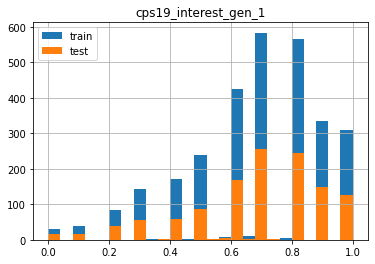

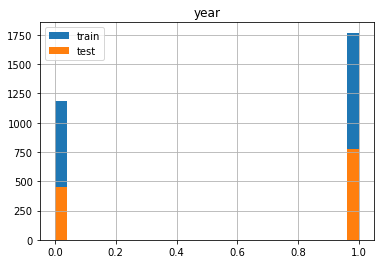

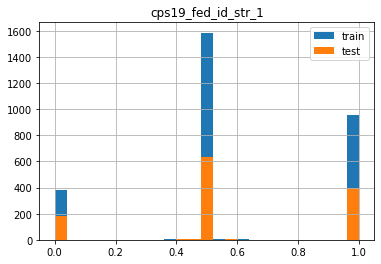

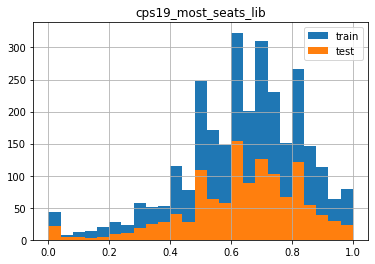

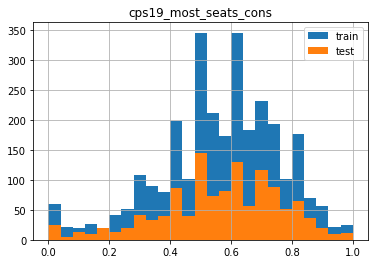

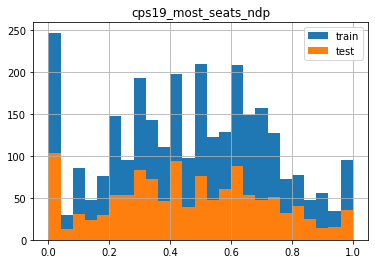

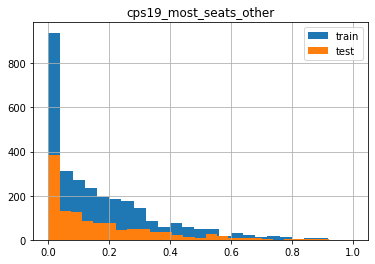

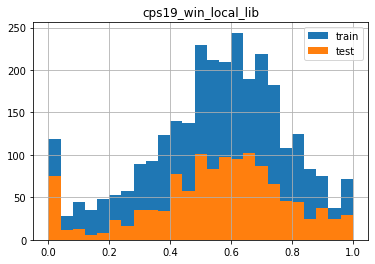

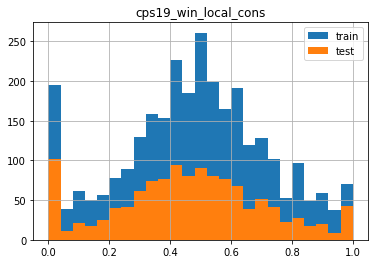

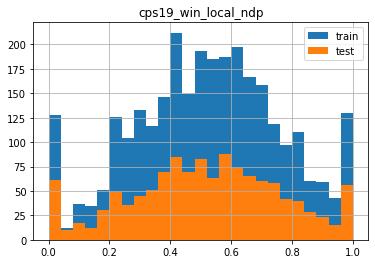

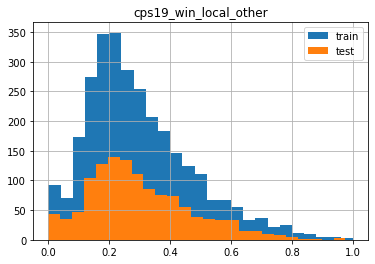

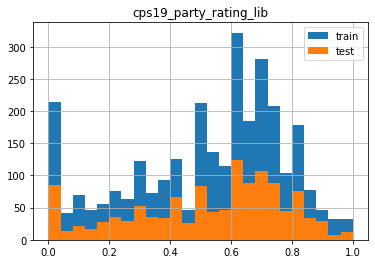

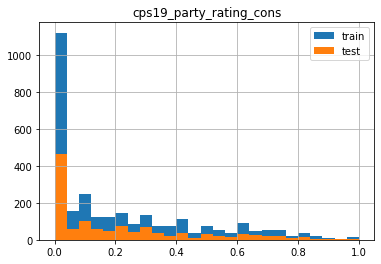

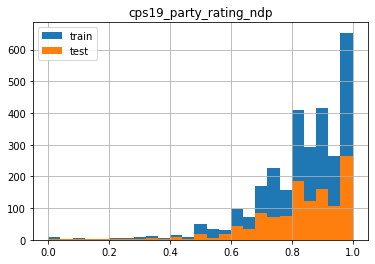

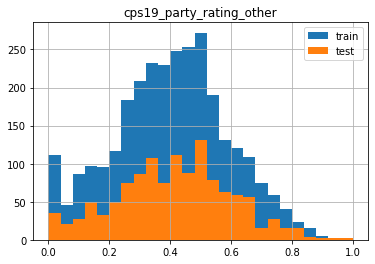

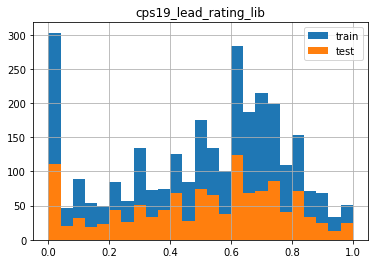

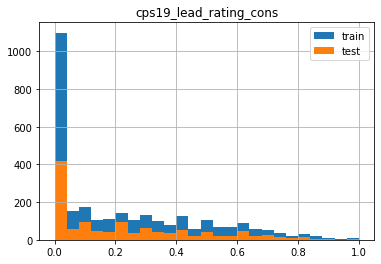

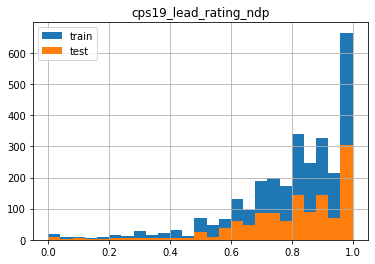

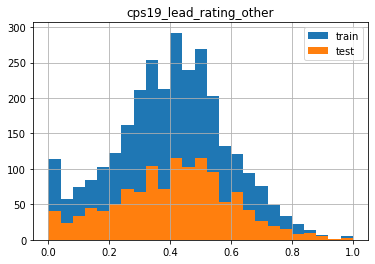

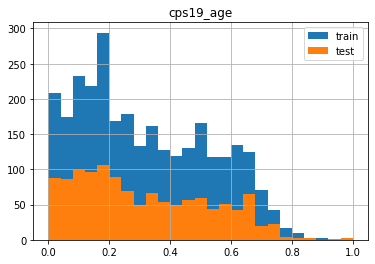

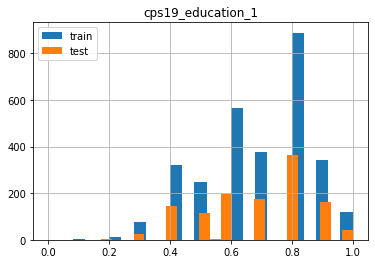

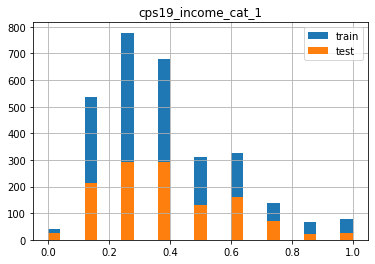

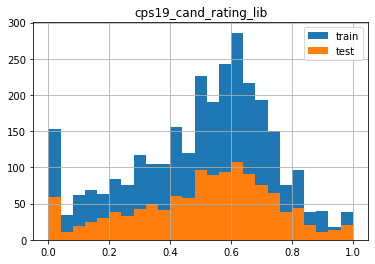

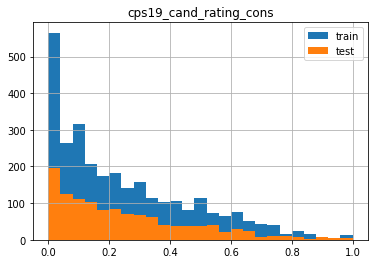

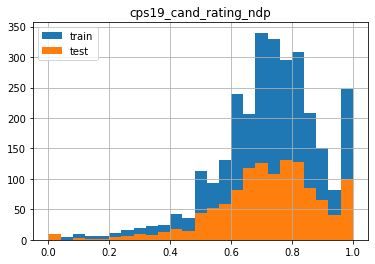

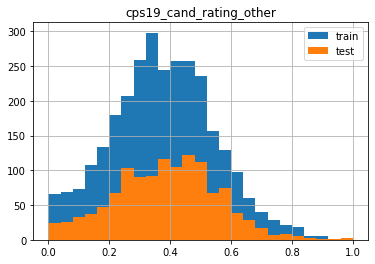

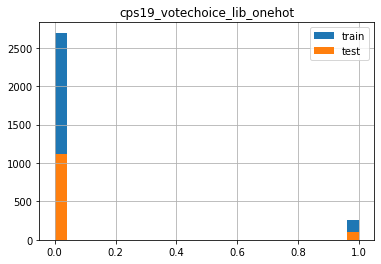

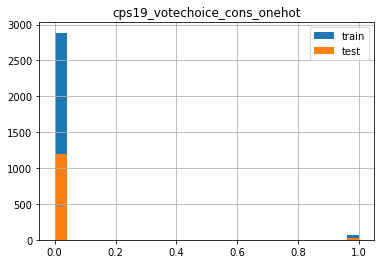

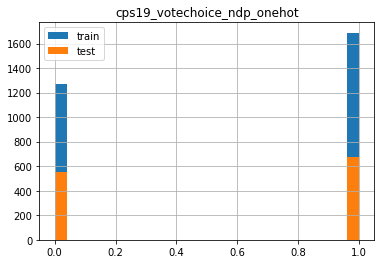

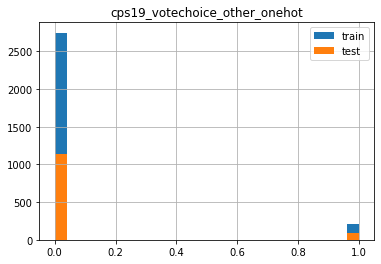

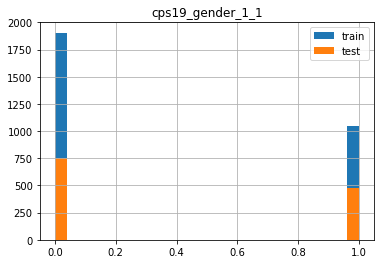

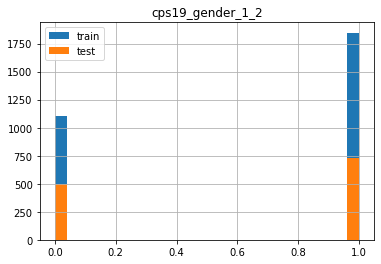

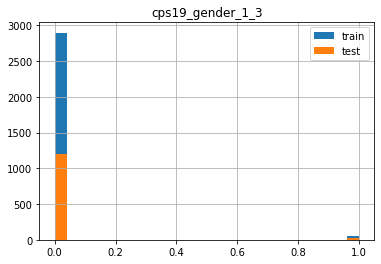

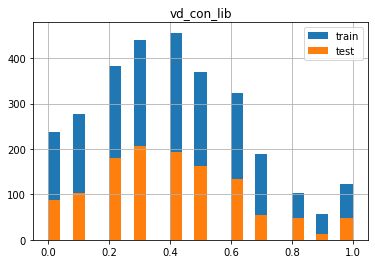

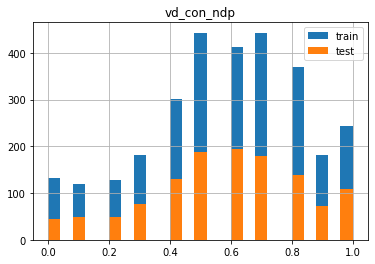

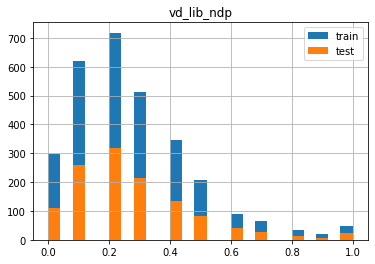

In [ ]:

from sklearn.preprocessing import MinMaxScaler
print(feature_list)
print(set(feature_list) - set(train_imp.columns)) 


data = pd.concat([train_imp[feature_list + predicted], test_imp[feature_list + predicted]])

scaled_data = MinMaxScaler().fit_transform(data.to_numpy())

X_train =  scaled_data[:train_imp.shape[0], :len(feature_list)]
X_test =  scaled_data[-test_imp.shape[0]:, :len(feature_list)]



# X_test = test_imp[feature_list].values
# y_test = test_imp[predicted]

# X_train = train_imp[feature_list].values
# y_train = train_imp[predicted]

# X_train=MinMaxScaler().fit_transform(X_train)
# X_test=MinMaxScaler().fit_transform(X_test)

# Classification
# ONLY USE FOR LOGISTIC REGRESSION
RUN_LOGISTIC_REGRESSION = False
if RUN_LOGISTIC_REGRESSION:
  tranches = [0, 2, 4, 8, 11]
  y_train = np.digitize(y_train, tranches) - 1
  y_test = np.digitize(y_test, tranches) - 1
else:
  y_test =  scaled_data[-test_imp.shape[0]:, -len(predicted):]
  y_train =  scaled_data[:train_imp.shape[0], -len(predicted):]
  pass


# kept_i = [i for i, feat in enumerate(feature_list) if feat in feature_list]
# X_train = X_train[:, kept_i]
# X_test = X_test[:, kept_i]
# print("x_train", X_train.shape, "y_train", y_train.shape,"X_test", X_test.shape, "y_test", y_test.shape )


import matplotlib.pyplot as plt
NB_BINS=25

for f in feature_list: 
  x_train_df = pd.DataFrame(X_train, columns=feature_list)
  ax = x_train_df[f].hist(label="train", bins=NB_BINS)
  x_test_df = pd.DataFrame(X_test, columns=feature_list)
  x_test_df[f].hist(ax=ax, label="test", bins=NB_BINS)
  plt.legend()
  plt.title(f)
  plt.show()

for p in predicted:
  y_train_df = pd.DataFrame(y_train, columns=predicted)
  ax = y_train_df[p].hist(label="train", bins=NB_BINS)
  y_test_df = pd.DataFrame(y_test, columns=predicted)
  y_test_df[p].hist(ax=ax, label="test", bins=NB_BINS)
  plt.legend()
  plt.title(p)
  plt.show()

## Models

### Lasso CV

x_train (2955, 21) y_train (2955, 3) X_test (1229, 21) y_test (1229, 3)
---vd_con_lib----
cps19_interest_gen_1-> 5%:-0.1100 mean_boot:-0.0061 std: 0.0182  95%:-0.0334
year-> 5%:-0.0190 mean_boot:0.0017 std: 0.0087  95%:0.0168
cps19_fed_id_str_1-> 5%:0.0359 mean_boot:0.0030 std: 0.0119  95%:0.0851
cps19_most_seats_lib-> 5%:0.0344 mean_boot:0.0030 std: 0.0204  95%:0.1227
cps19_most_seats_cons-> 5%:0.0073 mean_boot:0.0048 std: 0.0199  95%:0.0962
cps19_win_local_lib-> 5%:-0.0458 mean_boot:0.0076 std: 0.0171  95%:0.0257
cps19_win_local_cons-> 5%:0.1235 mean_boot:0.0044 std: 0.0161  95%:0.1931
cps19_party_rating_lib-> 5%:0.1981 mean_boot:0.0026 std: 0.0224  95%:0.2985
cps19_party_rating_cons-> 5%:-0.2588 mean_boot:-0.0025 std: 0.0221  95%:-0.1632
cps19_lead_rating_lib-> 5%:0.0084 mean_boot:0.0007 std: 0.0200  95%:0.0991
cps19_lead_rating_cons-> 5%:-0.3075 mean_boot:-0.0033 std: 0.0217  95%:-0.2110
cps19_age-> 5%:-0.1041 mean_boot:-0.0035 std: 0.0173  95%:-0.0264
cps19_education_1-> 5%:-0.133

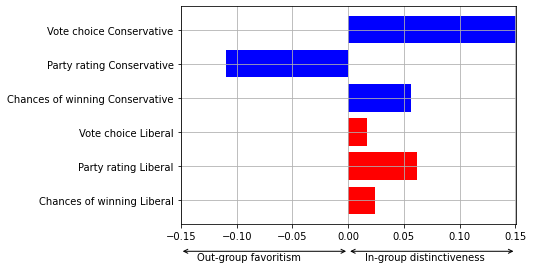

MSE depending on alpha value for each fold (5-fold): lambda*: 3.369E-04


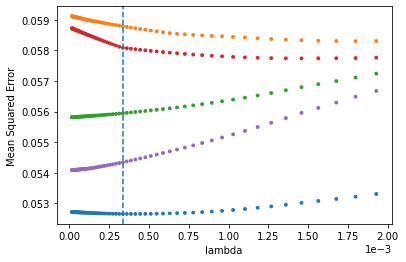

(2955, 21) (2955,)
Residuals:
    Min      1Q  Median     3Q    Max
-0.9487 -0.1383  0.0287 0.1705 0.5269


Coefficients:
                              Estimate               Std. Error         t value   p value
_intercept                    0.318485  327894.825242-0.000000j  0.0000+0.0000j  0.999999
cps19_interest_gen_1         -0.039893   0.01983500-0.00000000j -2.0112-0.0000j  0.044390
year                          0.000000   0.00880600-0.00000000j  0.0000+0.0000j  1.000000
cps19_fed_id_str_1            0.032802   0.01359700-0.00000000j  2.4124+0.0000j  0.015907
cps19_most_seats_lib          0.040829   0.02810900-0.00000000j  1.4525+0.0000j  0.146463
cps19_most_seats_cons         0.029741   0.02640800-0.00000000j  1.1262+0.0000j  0.260175
cps19_win_local_lib           0.007617   0.02395700-0.00000000j  0.3180+0.0000j  0.750540
cps19_win_local_cons          0.082430   0.02148500-0.00000000j  3.8365+0.0000j  0.000127
cps19_party_rating_lib        0.126293   0.03171500-0.00000000j  3.9

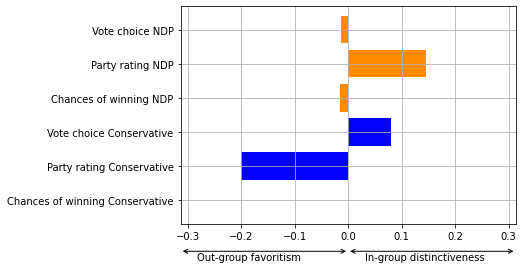

MSE depending on alpha value for each fold (5-fold): lambda*: 2.754E-04


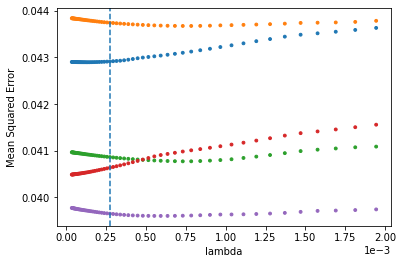

(2955, 21) (2955,)
Residuals:
    Min     1Q  Median     3Q    Max
-0.7696 -0.141 -0.0063 0.1322 0.8115


Coefficients:
                              Estimate               Std. Error          t value   p value
_intercept                    0.349472  0.018108+226794.388999j   0.0000-0.0000j  0.999999
cps19_interest_gen_1          0.024493   0.01728900-0.00006000j   1.4167+0.0049j  0.156679
year                          0.000170   0.00752700-0.00002200j   0.0226+0.0001j  0.981983
cps19_fed_id_str_1            0.028286   0.01296500-0.00002200j   2.1817+0.0036j  0.029213
cps19_most_seats_cons         0.000000   0.02149300-0.00003200j   0.0000+0.0000j  1.000000
cps19_most_seats_ndp         -0.000000   0.01911400-0.00000200j  -0.0000+0.0000j  1.000000
cps19_win_local_cons          0.000000   0.01869600-0.00001700j   0.0000+0.0000j  1.000000
cps19_win_local_ndp          -0.028545   0.02158100-0.00001200j  -1.3227-0.0007j  0.186043
cps19_party_rating_cons      -0.312871   0.02719700-0.0000070

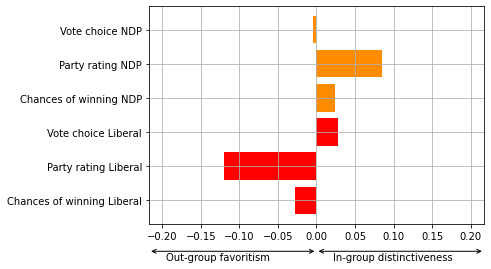

MSE depending on alpha value for each fold (5-fold): lambda*: 4.535E-04


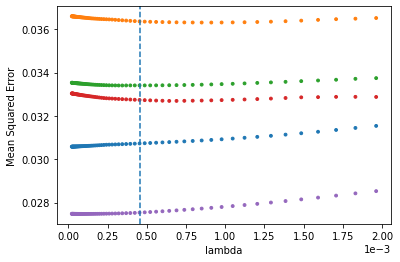

(2955, 21) (2955,)
Residuals:
    Min     1Q  Median     3Q    Max
-0.7896 -0.094  0.0183 0.1125 0.5725


Coefficients:
                             Estimate               Std. Error         t value   p value
_intercept                   0.219834  318354.176238+0.000000j  0.0000-0.0000j  0.999999
cps19_interest_gen_1         0.025133   0.01584500-0.00000000j  1.5861+0.0000j  0.112817
year                        -0.002352   0.00677200+0.00000000j -0.3473+0.0000j  0.728398
cps19_fed_id_str_1           0.056338   0.01148800-0.00000000j  4.9039+0.0000j  0.000001
cps19_most_seats_lib        -0.056887   0.02017400+0.00000000j -2.8198+0.0000j  0.004838
cps19_most_seats_ndp         0.042722   0.01633400-0.00000000j  2.6156+0.0000j  0.008953
cps19_win_local_lib          0.000000   0.01805900+0.00000000j  0.0000+0.0000j  1.000000
cps19_win_local_ndp          0.004415   0.01858900+0.00000000j  0.2375-0.0000j  0.812279
cps19_party_rating_lib      -0.217088   0.02410400+0.00000000j -9.0061+0.0000j 

In [ ]:


from sklearn.linear_model import LassoCV, Lasso
from regressors import stats    

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
padto = len(max(feature_list, key=len))

def compute_bootstrap_on_data(label, labels, X, n_iter=1000):
  n_obs = X.shape[0]
  runs = []

  for i in range(n_iter):
    ind = np.random.choice(np.arange(n_obs),size=n_obs, replace=True)
    X_samples = X[ind, :]
    _m = np.mean(X_samples, axis=0)
    runs.append(_m)

  runs = np.array(runs)
  
  m = np.mean(runs,axis=0)
  std = np.std(runs,axis=0)
  p_5 = np.percentile(runs, 5, axis=0)
  p_95 = np.percentile(runs, 95, axis=0)
  print(f"---{label}----")

  for i in range(m.shape[0]):
    print(f"{labels[i]}-> 5%:{p_5[i]:.4f} mean:{m[i]:.4f} std:{std[i]:.4f} 95%:{p_95[i]:.4f}")

def compute_residual_bootstrap(label, labels, X, y, n_iter=1000):
  """
  Modified residual bootstrap of Chatterjee & Lahiri (2011) [JASA 106(494), p.608-625].

  Note: It is not known whether the CV-based selection of the penalty ``alpha``
  satisfies the consistency conditions in the paper.  Let's assume that it does.

  Args:
      X: Covariate matrix of size ``n_obs x n_features``.
      y: Response vector of size ``n_obs``.
      n_iter: Number of bootstrap iterations.

  Returns:
      A dictionary with elements
      
      - **boot** - Coefficient bootstrap matrix of size ``n_iter x n_features``.
      - **mean** - Bootstrap coefficient mean vector of size ``n_features``.
      - **std** - Bootstrap coefficient standard deviation vector of size ``n_features``.
      - **lower** - Lower bootstrap confidence interval vector of size ``n_features``. 
      - **upper** - Upper bootstrap confidence interval vector of size ``n_features``.
  """
  n_obs = X.shape[0]
  runs = []

  # first run: all data with LassoCV
  model = LassoCV()
  model.fit(X, y)

  # subsequent runs: residual bootstrap with alpha fixed and clipped coefficients
  beta_clipped = np.where(np.abs(model.coef_) >= 1/n_obs**0.5, model.coef_, 0.0)
  y_pred = np.matmul(X, beta_clipped).squeeze() # X * beta_clipped
  resid = y - y_pred
  resid = resid - np.mean(resid) # center the modified residuals
  alpha = model.alpha_ # fixed penalty parameter

  for i in range(n_iter):
    ind = np.random.choice(np.arange(n_obs), size=n_obs, replace=True)
    resid_samples = resid[ind]
    X_samples = X[ind, :]
    y_samples = y_pred + resid_samples
    model = Lasso(alpha=alpha)
    model.fit(X_samples,y_samples)
    # model.fit(X, y_samples)
    runs.append(model.coef_)

  runs = np.array(runs)

  # compute mean, standard deviations and 95% confidence intervals,
  # the latter using the basic bootstrap method
  mean_boot = np.mean(runs, axis=0)
  std_boot = np.std(runs, axis=0)
  lower_boot = 2 * beta_clipped - np.percentile(runs, 97.5, axis=0)
  upper_boot = 2 * beta_clipped - np.percentile(runs, 2.5, axis=0)
  print(f"---{label}----")

  for i in range(X.shape[1]):
    print(f"{labels[i]}-> 5%:{lower_boot[i]:.4f} mean_boot:{mean_boot[i]:.4f} std: {std_boot[i]:.4f}  95%:{upper_boot[i]:.4f}")


def compute_bootstrap_on_coefs(label, labels, X, y, n_iter=1000):
  n_obs = X.shape[0]
  runs = []

  for i in range(n_iter):
    ind = np.random.choice(np.arange(n_obs),size=n_obs, replace=True)
    X_samples = X[ind, :]
    y_samples = y[ind]
    model = LassoCV()
    model.fit(X_samples, y_samples)

    runs.append(model.coef_)

  runs = np.array(runs)
  
  std=np.std(runs,axis=0)
  m = np.mean(runs,axis=0)
  p_5 = np.percentile(runs, 5, axis=0)
  p_95 = np.percentile(runs, 95, axis=0)

  print(f"---{label}----")

  for i in range(m.shape[0]):
    print(f"{labels[i]}-> 5%:{p_5[i]:.4f} mean:{m[i]:.4f} std: {std[i]:.4f}  95%:{p_95[i]:.4f}")


def party_formatter_factory(party):
    def format(d):
      party_label = PARTIES.get(party)["lbl"] if PARTIES.get(party) else ""
      return f'{d["feat"].replace(f"{party}", "").replace("cps19", "").replace("_", " ").replace("onehot","")} {party_label}'
    return format

def mapper_factory(prefix=""):
    def mapper(d):
      return f'{party_formatter_factory(prefix)(d)}{d["coeff"]:.2f}'
    return mapper

def plot_cross_validation_paths(lr_model):
  CUTOFF = 0.002
  NUM_POINTS=75
  ax = plt.gca()
  n_pt, folds = lr_model.mse_path_.shape
  for i in range(0,folds):
    data = {alpha: lr_model.mse_path_[j,i] for j, alpha in enumerate(lr_model.alphas_) if alpha < CUTOFF}
    # ax.scatter(lr_model.alphas_[-NUM_POINTS:], lr_model.mse_path_[-NUM_POINTS:,i], s=[8]*NUM_POINTS)
    ax.scatter(data.keys(),data.values(), s=[8]*len(data.keys()))
  ax.axvline(x=lr_model.alpha_, linestyle='--')
  print(f"MSE depending on alpha value for each fold (5-fold): lambda*: {lr_model.alpha_:.3E}")
  plt.ylabel("Mean Squared Error")
  plt.xlabel("lambda")
  plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
  plt.show()


PARTIES =  {"lib": {"c": "red", "lbl": "Liberal"}, "cons": {"c":"blue", "lbl":"Conservative"}, "ndp": {"c":"darkorange","lbl": "NDP"}}

GROUPINGS = {
    "Party rating": ["rating"],
    "Chances of winning": ["win_local","most_seats"],
    "Vote choice": ["votechoice"]
}
GROUP_FEATURES = True

def plot_magnitude(lr_model, excluded_parties):
  model_features = build_model_features(excluded_parties)
  padto = len(max(feature_list, key=len))

  party_map = defaultdict(list)
  other_vars = []
  zero_vars = []
  all_vars = []
  ax = plt.gca()
  mean_features_by_party = {}

  for i in np.argsort(np.abs(lr_model.coef_))[::-1]:
    feature = model_features[i]

    all_vars.append({"feat": feature, "coeff": lr_model.coef_[i]})
    
    not_party_var = all(p not in feature for p in PARTIES.keys())
    if lr_model.coef_[i] == 0.0 and not_party_var :
      zero_vars.append({"feat": feature, "coeff": 0.0})
    elif not_party_var: 
      other_vars.append({"feat": feature, "coeff": lr_model.coef_[i]})
    else:
      for party in PARTIES.keys():
        # Initialize dict
        if mean_features_by_party.get(party) is None:
          mean_features_by_party[party] = defaultdict(list)            

        group = [key for key, labels in GROUPINGS.items() if any(l in feature  for l in labels) ]
        # accumulate variables so that we can compute the mean
        if party in feature:
          if group and GROUP_FEATURES: 
              mean_features_by_party[party][group[0]].append({"feat": feature, "coeff": lr_model.coef_[i]})
          else:
              party_map[party].append({"feat": feature, "coeff":lr_model.coef_[i] })
  print(mean_features_by_party)
 # Compute mean over groupings of variables and replace with computed value in party_map dict
  for party, party_dict in mean_features_by_party.items():
     for group, feature_coefs in party_dict.items():
       party_map[party].append({"feat": group, "coeff":np.mean(list(map(lambda x: x["coeff"], feature_coefs))) })

  
  # Coefficients magnitude report
  offset = 0
  ax.grid(True)
  ordered_features = []
  print("\n".join(map(mapper_factory(), all_vars)))
  # print('\nOthers')
  # print("\n".join(map(mapper_factory(), other_vars)))
  # print("\nZeros")
  # print("\n".join(map(mapper_factory(), zero_vars)))
  for party, config in PARTIES.items():
    print(f"{party.capitalize()}")
   
    # Print coefficients along with feature name
    # print("\n".join(map(mapper_factory(party), party_map[party])))
    
    # Sort keys alphabetically 
    party_data = sorted(party_map[party], key=lambda d: d['feat']) 
    # Show coeffs magnitude on one graph, grouped by party
    idx = range(offset, offset + len(party_data))
    offset += len(party_data)
    party_coefs = list(map(lambda d: d["coeff"], party_data))
    ordered_features += list(map(party_formatter_factory(party), party_data))
    ax.barh(idx, party_coefs, align='center', color=config["c"])
    print("Coefficients magnitude")
  
  scale_factor = 1.0
  maxi = np.max(np.abs(lr_model.coef_))
  plt.xlim(-scale_factor*maxi, scale_factor*maxi)
  # Big hack. should
  # plt.xlabel("Something                                     Else")
  
  plt.annotate('', xy=(0,-1.5),xytext=(-maxi,-1.5),             
            arrowprops=dict(arrowstyle='<->',facecolor='red'),   
            annotation_clip=False)  
  plt.annotate('Out-group favoritism',xy=(0,-1.75),xytext=(-maxi*0.9,-1.75),               
            annotation_clip=False)
  
  plt.annotate('', xy=(0,-1.5),xytext=(maxi,-1.5), 
            arrowprops=dict(arrowstyle='<->',facecolor='red'), 
            annotation_clip=False)  
  plt.annotate('In-group distinctiveness',xy=(0,-1.75),xytext=(maxi*0.1,-1.75),    
            annotation_clip=False)
  
  plt.yticks(range(offset), ordered_features)
  plt.show()

for i, pred_description in enumerate(descriptive_predicted):
  excluded_parties = pred_description["exclude"]
  labels = [feat if type(feat) == str else feat["col"] for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  kept_i = [i for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  model_X_train = X_train[:, kept_i]
  model_X_test = X_test[:, kept_i]
  model_y_train=y_train[:, i]  
  print("x_train", model_X_train.shape, "y_train", y_train.shape,"X_test", model_X_test.shape, "y_test", y_test.shape )

  # compute_bootstrap_on_data(predicted[i], labels, model_X_train)
  # compute_bootstrap_on_coefs(predicted[i], labels, model_X_train, model_y_train)
  compute_residual_bootstrap(predicted[i], labels, model_X_train, model_y_train)



  print('Predicting %s ...' % predicted[i])
  lr_model = LassoCV()
  lr_model.fit(model_X_train, model_y_train)
  y_pred = lr_model.predict(model_X_test)
  
  # Try to find the precise value that optimizes the score
  score =  lr_model.score(model_X_test, y_test[:, i])
  print("Model Score", score, "alpha: ", lr_model.alpha_)
  # Print coefficients for non zero values
  plot_magnitude(lr_model, excluded_parties)

  # Plot alpha Cross validation search path
  plot_cross_validation_paths(lr_model)

  print(model_X_train.shape, model_y_train.shape)
  stats.coef_pval(lr_model, model_X_train, model_y_train)
  stats.summary(lr_model, model_X_train, model_y_train, labels)


### Regression Linéraire

In [ ]:
from sklearn.linear_model import LinearRegression as LR
for i, pred_description in enumerate(descriptive_predicted):
  excluded_parties = pred_description["exclude"]
  labels = [feat if type(feat) == str else feat["col"] for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  kept_i = [i for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  model_X_train = X_train[:, kept_i]
  model_X_test = X_test[:, kept_i]
  print("x_train", model_X_train.shape, "y_train", y_train.shape,"X_test", model_X_test.shape, "y_test", y_test.shape )
  model_y_train=y_train[:, i]

  print('Predicting %s ...' % predicted[i])
  lr_model = LR()
  lr_model.fit(model_X_train, model_y_train)
  y_pred = lr_model.predict(model_X_test)
  
  # Try to find the precise value that optimizes the score
  score =  lr_model.score(model_X_test, y_test[:, i])
  # print("Model Score", score, "alpha: ", lr_model.alpha_)
  # Print coefficients for non zero values
  plot_magnitude(lr_model, excluded_parties)


  print(model_X_train.shape, model_y_train.shape)
  stats.coef_pval(lr_model, model_X_train, model_y_train)
  stats.summary(lr_model, model_X_train, model_y_train, labels)


In [ ]:

from sklearn.linear_model import LinearRegression as LR
from regressors import stats   
from sklearn import utils
import numpy as np

import matplotlib.pyplot as plt

models = {}
for vd_i in range(len(predicted)):
  print('Predicting %s ...' % predicted[vd_i])
  lr_model = LR()
  lr_model.fit(X_train, y_train[:, vd_i])
  y_pred = lr_model.predict(X_test)
  print('model score:', lr_model.score(X_test, y_test[:, vd_i]))
  padto = len(max(feature_list, key=len))
  # for i in np.argsort(np.abs(lr_model.coef_))[::-1]:
  for i in np.argsort(lr_model.coef_)[::-1]:
    print(feature_list[i].ljust(padto), lr_model.coef_[i])
  models = {predicted[vd_i]: lr_model}
# df["cps19_debate_fr_1"].value_counts()
# df[predicted].value_counts()
# print(confusion_matrix(y_test, y_pred))

 stats.coef_pval(lr_model, model_X_train, model_y_train)
  stats.summary(lr_model, model_X_train, model_y_train, labels)

In [ ]:


from sklearn.linear_model import LassoCV
from regressors import stats    

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
padto = len(max(feature_list, key=len))
def party_formatter_factory(party):
    def format(d):
      party_label = PARTIES.get(party)["lbl"] if PARTIES.get(party) else ""
      return f'{d["feat"].replace(f"{party}", "").replace("cps19", "").replace("_", " ").replace("onehot","")} {party_label}'
    return format

def mapper_factory(prefix=""):
    def mapper(d):
      return f'{party_formatter_factory(prefix)(d)}{d["coeff"]:.2f}'
    return mapper

def plot_cross_validation_paths(lr_model):
  CUTOFF = 0.002
  NUM_POINTS=75
  ax = plt.gca()
  n_pt, folds = lr_model.mse_path_.shape
  for i in range(0,folds):
    data = {alpha: lr_model.mse_path_[j,i] for j, alpha in enumerate(lr_model.alphas_) if alpha < CUTOFF}
    # ax.scatter(lr_model.alphas_[-NUM_POINTS:], lr_model.mse_path_[-NUM_POINTS:,i], s=[8]*NUM_POINTS)
    ax.scatter(data.keys(),data.values(), s=[8]*len(data.keys()))
  ax.axvline(x=lr_model.alpha_, linestyle='--')
  print(f"MSE depending on alpha value for each fold (5-fold): lambda*: {lr_model.alpha_:.3E}")
  plt.ylabel("Mean Squared Error")
  plt.xlabel("lambda")
  plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
  plt.show()


PARTIES =  {"lib": {"c": "red", "lbl": "Liberal"}, "cons": {"c":"blue", "lbl":"Conservative"}, "ndp": {"c":"darkorange","lbl": "NDP"}}

GROUPINGS = {
    "Party rating": ["rating"],
    "Chances of winning": ["win_local","most_seats"],
    "Vote choice": ["votechoice"]
}
GROUP_FEATURES = True

def plot_magnitude(lr_model, excluded_parties):
  model_features = build_model_features(excluded_parties)
  padto = len(max(feature_list, key=len))

  party_map = defaultdict(list)
  other_vars = []
  zero_vars = []
  all_vars = []
  ax = plt.gca()
  mean_features_by_party = {}

  for i in np.argsort(np.abs(lr_model.coef_))[::-1]:
    feature = model_features[i]

    all_vars.append({"feat": feature, "coeff": lr_model.coef_[i]})
    
    not_party_var = all(p not in feature for p in PARTIES.keys())
    if lr_model.coef_[i] == 0.0 and not_party_var :
      zero_vars.append({"feat": feature, "coeff": 0.0})
    elif not_party_var: 
      other_vars.append({"feat": feature, "coeff": lr_model.coef_[i]})
    else:
      for party in PARTIES.keys():
        # Initialize dict
        if mean_features_by_party.get(party) is None:
          mean_features_by_party[party] = defaultdict(list)            

        group = [key for key, labels in GROUPINGS.items() if any(l in feature  for l in labels) ]
        # accumulate variables so that we can compute the mean
        if party in feature:
          if group and GROUP_FEATURES: 
              mean_features_by_party[party][group[0]].append({"feat": feature, "coeff": lr_model.coef_[i]})
          else:
              party_map[party].append({"feat": feature, "coeff":lr_model.coef_[i] })
  print(mean_features_by_party)
 # Compute mean over groupings of variables and replace with computed value in party_map dict
  for party, party_dict in mean_features_by_party.items():
     for group, feature_coefs in party_dict.items():
       party_map[party].append({"feat": group, "coeff":np.mean(list(map(lambda x: x["coeff"], feature_coefs))) })

  
  # Coefficients magnitude report
  offset = 0
  ax.grid(True)
  ordered_features = []
  print("\n".join(map(mapper_factory(), all_vars)))
  # print('\nOthers')
  # print("\n".join(map(mapper_factory(), other_vars)))
  # print("\nZeros")
  # print("\n".join(map(mapper_factory(), zero_vars)))
  for party, config in PARTIES.items():
    print(f"{party.capitalize()}")
   
    # Print coefficients along with feature name
    # print("\n".join(map(mapper_factory(party), party_map[party])))
    
    # Sort keys alphabetically 
    party_data = sorted(party_map[party], key=lambda d: d['feat']) 
    # Show coeffs magnitude on one graph, grouped by party
    idx = range(offset, offset + len(party_data))
    offset += len(party_data)
    party_coefs = list(map(lambda d: d["coeff"], party_data))
    ordered_features += list(map(party_formatter_factory(party), party_data))
    ax.barh(idx, party_coefs, align='center', color=config["c"])
    print("Coefficients magnitude")
  
  scale_factor = 1.0
  maxi = np.max(np.abs(lr_model.coef_))
  plt.xlim(-scale_factor*maxi, scale_factor*maxi)
  plt.yticks(range(offset), ordered_features)
  plt.show()

for i, pred_description in enumerate(descriptive_predicted):
  excluded_parties = pred_description["exclude"]
  labels = [feat if type(feat) == str else feat["col"] for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  kept_i = [i for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  model_X_train = X_train[:, kept_i]
  model_X_test = X_test[:, kept_i]
  print("x_train", model_X_train.shape, "y_train", y_train.shape,"X_test", model_X_test.shape, "y_test", y_test.shape )
  model_y_train=y_train[:, i]

  print('Predicting %s ...' % predicted[i])
  lr_model = LassoCV()
  lr_model.fit(model_X_train, model_y_train)
  y_pred = lr_model.predict(model_X_test)
  
  # Try to find the precise value that optimizes the score
  score =  lr_model.score(model_X_test, y_test[:, i])
  print("Model Score", score, "alpha: ", lr_model.alpha_)
  # Print coefficients for non zero values
  plot_magnitude(lr_model, excluded_parties)

  # Plot alpha Cross validation search path
  plot_cross_validation_paths(lr_model)

  print(model_X_train.shape, model_y_train.shape)
  stats.coef_pval(lr_model, model_X_train, model_y_train)
  stats.summary(lr_model, model_X_train, model_y_train, labels)


In [ ]:


from sklearn.linear_model import LassoCV
from regressors import stats    

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
padto = len(max(feature_list, key=len))
def party_formatter_factory(party):
    def format(d):
      party_label = PARTIES.get(party)["lbl"] if PARTIES.get(party) else ""
      return f'{d["feat"].replace(f"{party}", "").replace("cps19", "").replace("_", " ").replace("onehot","")} {party_label}'
    return format

def mapper_factory(prefix=""):
    def mapper(d):
      return f'{party_formatter_factory(prefix)(d)}{d["coeff"]:.2f}'
    return mapper

def plot_cross_validation_paths(lr_model):
  CUTOFF = 0.002
  NUM_POINTS=75
  ax = plt.gca()
  n_pt, folds = lr_model.mse_path_.shape
  for i in range(0,folds):
    data = {alpha: lr_model.mse_path_[j,i] for j, alpha in enumerate(lr_model.alphas_) if alpha < CUTOFF}
    # ax.scatter(lr_model.alphas_[-NUM_POINTS:], lr_model.mse_path_[-NUM_POINTS:,i], s=[8]*NUM_POINTS)
    ax.scatter(data.keys(),data.values(), s=[8]*len(data.keys()))
  ax.axvline(x=lr_model.alpha_, linestyle='--')
  print(f"MSE depending on alpha value for each fold (5-fold): lambda*: {lr_model.alpha_:.3E}")
  plt.ylabel("Mean Squared Error")
  plt.xlabel("lambda")
  plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
  plt.show()


PARTIES =  {"lib": {"c": "red", "lbl": "Liberal"}, "cons": {"c":"blue", "lbl":"Conservative"}, "ndp": {"c":"darkorange","lbl": "NDP"}}

GROUPINGS = {
    "Party rating": ["rating"],
    "Chances of winning": ["win_local","most_seats"],
    "Vote choice": ["votechoice"]
}
GROUP_FEATURES = True

def plot_magnitude(lr_model, excluded_parties):
  model_features = build_model_features(excluded_parties)
  padto = len(max(feature_list, key=len))

  party_map = defaultdict(list)
  other_vars = []
  zero_vars = []
  all_vars = []
  ax = plt.gca()
  mean_features_by_party = {}

  for i in np.argsort(np.abs(lr_model.coef_))[::-1]:
    feature = model_features[i]

    all_vars.append({"feat": feature, "coeff": lr_model.coef_[i]})
    
    not_party_var = all(p not in feature for p in PARTIES.keys())
    if lr_model.coef_[i] == 0.0 and not_party_var :
      zero_vars.append({"feat": feature, "coeff": 0.0})
    elif not_party_var: 
      other_vars.append({"feat": feature, "coeff": lr_model.coef_[i]})
    else:
      for party in PARTIES.keys():
        # Initialize dict
        if mean_features_by_party.get(party) is None:
          mean_features_by_party[party] = defaultdict(list)            

        group = [key for key, labels in GROUPINGS.items() if any(l in feature  for l in labels) ]
        # accumulate variables so that we can compute the mean
        if party in feature:
          if group and GROUP_FEATURES: 
              mean_features_by_party[party][group[0]].append({"feat": feature, "coeff": lr_model.coef_[i]})
          else:
              party_map[party].append({"feat": feature, "coeff":lr_model.coef_[i] })
  print(mean_features_by_party)
 # Compute mean over groupings of variables and replace with computed value in party_map dict
  for party, party_dict in mean_features_by_party.items():
     for group, feature_coefs in party_dict.items():
       party_map[party].append({"feat": group, "coeff":np.mean(list(map(lambda x: x["coeff"], feature_coefs))) })

  
  # Coefficients magnitude report
  offset = 0
  ax.grid(True)
  ordered_features = []
  print("\n".join(map(mapper_factory(), all_vars)))
  # print('\nOthers')
  # print("\n".join(map(mapper_factory(), other_vars)))
  # print("\nZeros")
  # print("\n".join(map(mapper_factory(), zero_vars)))
  for party, config in PARTIES.items():
    print(f"{party.capitalize()}")
   
    # Print coefficients along with feature name
    # print("\n".join(map(mapper_factory(party), party_map[party])))
    
    # Sort keys alphabetically 
    party_data = sorted(party_map[party], key=lambda d: d['feat']) 
    # Show coeffs magnitude on one graph, grouped by party
    idx = range(offset, offset + len(party_data))
    offset += len(party_data)
    party_coefs = list(map(lambda d: d["coeff"], party_data))
    ordered_features += list(map(party_formatter_factory(party), party_data))
    ax.barh(idx, party_coefs, align='center', color=config["c"])
    print("Coefficients magnitude")
  
  scale_factor = 1.0
  maxi = np.max(np.abs(lr_model.coef_))
  plt.xlim(-scale_factor*maxi, scale_factor*maxi)
  plt.yticks(range(offset), ordered_features)
  plt.show()

for i, pred_description in enumerate(descriptive_predicted):
  excluded_parties = pred_description["exclude"]
  labels = [feat if type(feat) == str else feat["col"] for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  kept_i = [i for i, feat in enumerate(descriptive_feature_list) if type(feat) == str or feat["party"] not in excluded_parties]
  model_X_train = X_train[:, kept_i]
  model_X_test = X_test[:, kept_i]
  print("x_train", model_X_train.shape, "y_train", y_train.shape,"X_test", model_X_test.shape, "y_test", y_test.shape )
  model_y_train=y_train[:, i]

  print('Predicting %s ...' % predicted[i])
  lr_model = LassoCV()
  lr_model.fit(model_X_train, model_y_train)
  y_pred = lr_model.predict(model_X_test)
  
  # Try to find the precise value that optimizes the score
  score =  lr_model.score(model_X_test, y_test[:, i])
  print("Model Score", score, "alpha: ", lr_model.alpha_)
  # Print coefficients for non zero values
  plot_magnitude(lr_model, excluded_parties)

  # Plot alpha Cross validation search path
  plot_cross_validation_paths(lr_model)

  print(model_X_train.shape, model_y_train.shape)
  stats.coef_pval(lr_model, model_X_train, model_y_train)
  stats.summary(lr_model, model_X_train, model_y_train, labels)


### Lasso CV Alternative implementation

https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d


In [ ]:
def regmodel_param_plot(
    validation_score, train_score, alphas_to_try, chosen_alpha,
    scoring, test_score = None, filename = None):
    
    plt.figure(figsize = (8,8))
    sns.lineplot(y = validation_score, x = alphas_to_try, 
                 label = 'validation_data')
    sns.lineplot(y = train_score, x = alphas_to_try, 
                 label = 'training_data')
    plt.axvline(x=chosen_alpha, linestyle='--')
    if test_score is not None:
        sns.lineplot(y = test_score, x = alphas_to_try, 
                     label = 'test_data')
    plt.xlabel('alpha_parameter')
    plt.ylabel(scoring)
    plt.title('Lasso Regularisation')
    plt.legend()
    if filename is not None:
        plt.savefig(str(filename) + ".png")
    plt.show()

def regmodel_param_test(
    alphas_to_try, X, y, cv, scoring = 'r2',  X_test = None, y_test = None, 
    draw_plot = False, filename = None):
    
    validation_scores = []
    train_scores = []
    results_list = []
    if X_test is not None:
        test_scores = []
        scorer = get_scorer(scoring)
    else:
        test_scores = None

    for curr_alpha in alphas_to_try:
        regmodel = Lasso(alpha = curr_alpha)

        results = cross_validate(
            regmodel, X, y, scoring=scoring, cv=cv, 
            return_train_score = True)

        validation_scores.append(np.mean(results['test_score']))
        train_scores.append(np.mean(results['train_score']))
        results_list.append(results)

        if X_test is not None:
            regmodel.fit(X,y)
            y_pred = regmodel.predict(X_test)
            test_scores.append(scorer(regmodel, X_test, y_test))
    
    chosen_alpha_id = np.argmax(validation_scores)
    chosen_alpha = alphas_to_try[chosen_alpha_id]
    max_validation_score = np.max(validation_scores)
    if X_test is not None:
        test_score_at_chosen_alpha = test_scores[chosen_alpha_id]
    else:
        test_score_at_chosen_alpha = None
        
    if draw_plot:
        regmodel_param_plot(
            validation_scores, train_scores, alphas_to_try, chosen_alpha, 
            scoring, test_scores, filename)
    
    return chosen_alpha, max_validation_score, test_score_at_chosen_alpha

from sklearn.metrics import \
    r2_score, get_scorer
from sklearn.model_selection import \
    KFold, RepeatedKFold, GridSearchCV, \
    cross_validate
cv = KFold(n_splits=5, shuffle=True, random_state=5)
lasso_alphas = np.linspace(1e-8, 1, 100)

feature_to_train_idx = 2
print(predicted[feature_to_train_idx])
chosen_alpha, max_validation_score, test_score_at_chosen_alpha = \
    regmodel_param_test(
        lasso_alphas, X_train, y_train[:, feature_to_train_idx], 
        cv, scoring = 'r2',
        X_test = X_test, y_test = y_test[:,feature_to_train_idx], 
        draw_plot = True, filename=None) #filename = 'lasso_wide_search')

print("Chosen alpha: %f" % \
    chosen_alpha)
print("Validation score: %f" % \
    max_validation_score)
print("Test score at chosen alpha: %f" % \
    test_score_at_chosen_alpha)

### Lasso Regression

In [ ]:
from scipy.optimize.nonlin import NoConvergence
from sklearn.linear_model import LassoCV, Lasso
from sklearn import utils
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

models = {}
target_alphas = [0.0019, 0.002,1e-5 ]
for vd_i in range(2, len(predicted)):
  print('Predicting %s ...' % predicted[vd_i])
  scores = []
  errors = []
  alphas= []
  best_alpha = -9999999
  best_model = None
  best_score = -9999999
  # Try to find the precise value that optimizes the score
  delta = target_alphas[vd_i] / 2
  for alpha in np.linspace(target_alphas[vd_i] - delta, target_alphas[vd_i] + delta, num=50):
  # for alpha in np.logspace(0,1.5, num=300, endpoint=True) /10000:
    lr_model = Lasso(alpha=alpha)
    # lr_model = Lasso(alpha=0.0015)
    lr_model.fit(X_train, y_train[:, vd_i])
    y_pred = lr_model.predict(X_test)
    error = mean_squared_error(y_test[:, vd_i], y_pred)
    errors.append(error)
    score =  lr_model.score(X_train, y_train[:, vd_i])
    if score > best_score:
      best_alpha = alpha
      best_model = lr_model
      best_score = score
    
    
    alphas.append(alpha)
    scores.append(score)
  print(f"optimal alpha for {predicted[vd_i]}: alpha:{best_alpha} score:{best_score}")
  plt.plot(alphas, scores)
  plt.ylabel("Score")
  plt.xlabel("lambda")
  plt.show()

  plt.plot(alphas, errors)
  plt.ylabel("Mean-Squared Error")
  plt.xlabel("lambda")
  plt.show()

  padto = len(max(feature_list, key=len))
  non_zero_coefs = {}
  for i in np.argsort(np.abs(best_model.coef_))[::-1]:
    print(feature_list[i].ljust(padto), best_model.coef_[i])
    if best_model.coef_[i] != 0.0 :
      non_zero_coefs[feature_list[i]] = best_model.coef_[i]
  idx = range(len(non_zero_coefs))
  plt.barh(idx, list(non_zero_coefs.values()), align='center')
  plt.title("Coefficients")
  plt.yticks(idx, list(non_zero_coefs.keys()))
  plt.show()

  print("Test score on best model", lr_model.score(X_test, y_test[:, vd_i]) )


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor as RTree, plot_tree
from sklearn.metrics import mean_absolute_error

models = {}
for vd_i in range(len(predicted)):
  print('Predicting %s ...' % predicted[vd_i])
  regression_tree = RTree() #max_depth=X
  regression_tree.fit(X_train, y_train[:, vd_i])
  y_pred = regression_tree.predict(X_test)
  print(mean_absolute_error(y_test[:, vd_i], y_pred))
  models[predicted[vd_i]] =  regression_tree
# fig = plt.figure(figsize=(18,18))
# ax = fig.add_subplot(111)
# plot_tree(models[predicted[0]], ax=ax)

### Logistic Regression: Classification 


In [ ]:
from sklearn.linear_model import LogisticRegression as LogR
from sklearn.metrics import classification_report, confusion_matrix

padto = len(max(feature_list, key=len))
models = {}
for vd_i in range(len(predicted)):
  print('Predicting %s ...' % predicted[vd_i])
  lr_model = LogR(class_weight='balanced', max_iter=2000)
  lr_model.fit(X_train, y_train[:, vd_i])
  y_pred = lr_model.predict(X_test)

  tranche = 2
  for i in np.argsort(np.abs(lr_model.coef_[0][tranche]))[::-1]:
    pass
    # print(feature_list[i].ljust(padto), lr_model.coef_[:, i])
  print('Test results')
  y_pred = lr_model.predict(X_test)
  # print(confusion_matrix(y_test[:, vd_i], y_pred))
  print(classification_report(y_test[:, vd_i], y_pred))
  models[predicted[vd_i]] =  lr_model




### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier as DTree, plot_tree

models = {}
for vd_i in range(len(predicted)):
  print('Predicting %s ...' % predicted[vd_i])
  decision_tree = DTree(class_weight='balanced')
  decision_tree.fit(X_train, y_train[:, vd_i])
  y_pred = decision_tree.predict(X_test)
  print(confusion_matrix(y_test[:, vd_i], y_pred))
  print(classification_report(y_test[:, vd_i], y_pred))
  models[predicted[vd_i]] =  decision_tree

# plot_tree(models[predicted[0]])

### SkLearn Multi Layer Perceptron 

In [ ]:
from sklearn.neural_network import MLPClassifier as MLP
import matplotlib.pyplot as plt
models = {}
DEPTH = 1
for vd_i in range(len(predicted)):
  print('Predicting %s ...' % predicted[vd_i])
  mlp = MLP(hidden_layer_sizes=tuple(DEPTH*[X_train.shape[-1]]),
      early_stopping=True, validation_fraction=.2, batch_size=128, n_iter_no_change=3,
      verbose=True)
  mlp.fit(X_train, y_train[:, vd_i])
  # plt.plot(mlp.loss_curve_)

  y_pred = mlp.predict(X_test)
  print(confusion_matrix(y_test[:, vd_i], y_pred))
  print(classification_report(y_test[:, vd_i], y_pred))
  models = {predicted[vd_i]: lr_model}

### Keras MLP

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split as split

def build_MLP(vars, depth, classes, lr=1E-4):
  mlp = Sequential()
  mlp.add(Dense(vars, input_shape=(vars,), activation='relu', kernel_initializer='he_normal'))
  for _ in range(depth - 1):
    mlp.add(Dense(vars, activation='relu', kernel_initializer='he_normal'))
  mlp.add(Dense(classes, activation='softmax'))
  mlp.compile(optimizer=Adam(lr=lr), loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])
  return mlp

DEPTH = 3
for vd_i in range(len(predicted)):
  print('Predicting %s ...' % predicted[vd_i])
  classes, counts = np.unique(y_train[:, vd_i], return_counts=True)
  mlp = build_MLP(len(feature_list), DEPTH, len(classes))
  weights = np.sum(counts)/(len(classes) * counts)
  xtr, xva, ytr, yva = split(X_train, y_train[:, vd_i], test_size=.1111, stratify=y_train[:, vd_i])
  callbacks = [EarlyStopping(monitor='val_loss', mode='min',  patience=1, verbose=1, restore_best_weights=True)]
  mlp.fit(xtr, ytr,
          validation_data=(xva, yva),
          class_weight=dict(zip(classes, weights)),
          shuffle=True,
          batch_size=64, epochs=10,
          callbacks=callbacks)
  y_pred = mlp.predict(X_test).argmax(axis=-1)
  print(confusion_matrix(y_test[:, vd_i], y_pred))
  print(classification_report(y_test[:, vd_i], y_pred))


    


In [ ]:
import numpy as np

print(df.shape)
columns = ['cps19_gender', 'cps19_province', 'cps19_education_1', 'cps19_age', 'cps19_rel_imp_1', 'cps19_income_cat_1', 'cps19_demsat_1', 'cps19_duty_choice_1', 'cps19_pos_fptp_1', 'cps19_interest_gen_1', 'cps19_interest_elxn_1', 'cps19_debate_en_1', 'cps19_debate_fr_1', 'cps19_v_likely_1', 'cps19_votechoice_1', 'cps19_fed_id_1', 'cps19_fed_id_str_1', 'cps19_outcome_most_1', 'cps19_lr_scale_bef_1', 'cps19_lr_scale_aft_1',]# 'pes19_turnout2019', 'pes19_turnout2019_v2', 'pes19_votechoice2019', 'pes19_lr_self_1']
df[columns][~df[columns].isna().any(axis=1)]
print(len(columns))
nans = df[columns].isna().sum(axis=0)
keys = np.argsort(nans)
list(zip(np.array(columns)[keys], nans[keys]))
print(columns)
padto = len(max(columns, key=len))
for i in range(len(columns)):
  scores = []
  for j in range(i+1, len(columns)):
    inter = len(df[df[columns[i]].isna()&df[columns[j]].isna()])
    uni = len(df[df['cps19_income_number'].isna()|df['cps19_income_cat'].isna()])
    scores.append(('%0.3f' % (inter/uni)).lstrip('0'))
  print(columns[i].ljust(padto), ' ' * 5 * i, ' '.join(scores))
# df[df['cps19_income_number'].isna()&df['cps19_income_cat'].isna()]

In [ ]:
!pip install scikit-learn==1.0.2